# Data Visualization with Python

In this notebook you’ll get a broader coverage of the `Matplotlib` library and an overview of `seaborn`, a package for statistical graphics. Topics covered include customizing graphics, plotting two-dimensional arrays (like pseudocolor plots, contour plots, and images), statistical graphics (like visualizing distributions and regressions), and working with time series and image data.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

## Simple Line Chart
To show trend(s).

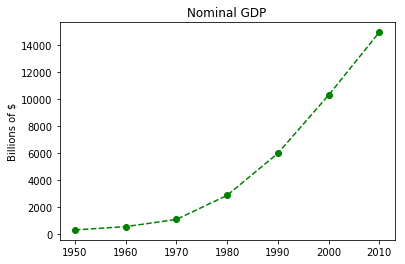

In [2]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

plt.plot(years, gdp, color='green', marker='o', linestyle='--')
plt.title("Nominal GDP")
plt.ylabel("Billions of $")
plt.savefig('images/viz_gdp.png')
plt.show();
#plt.gca().clear()

In [3]:
# clear the current figure so you can start fresh
plt.clf()

<Figure size 432x288 with 0 Axes>

## Line Charts

In [4]:
variance     = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]

In [5]:
total_error  = [x + y for x, y in zip(variance, bias_squared)]
total_error

[257, 130, 68, 40, 32, 40, 68, 130, 257]

In [6]:
# enumerate() puts variables into pairs
xs = [i for i in enumerate(variance)]
xs

[(0, 1), (1, 2), (2, 4), (3, 8), (4, 16), (5, 32), (6, 64), (7, 128), (8, 256)]

In [7]:
xs = [i for i, _ in enumerate(variance)]
xs

[0, 1, 2, 3, 4, 5, 6, 7, 8]

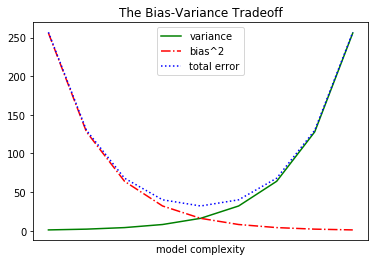

In [8]:
# We can make multiple calls to plt.plot
# to show multiple series on the same chart
plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

# Because we've assigned labels to each series,
# we can get a legend for free (loc=9 means "top center")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")
plt.savefig('images/viz_line_chart.png')
plt.show();

## Bar Chart
To show some quantity varies among some discrete set of items. 

In [9]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

In [10]:
r = range(len(movies))
r

range(0, 5)

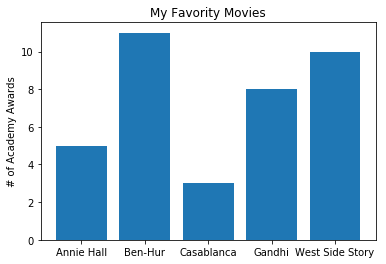

In [11]:
plt.bar(r, num_oscars)
plt.title("My Favority Movies")
plt.ylabel("# of Academy Awards")
plt.xticks(r, movies)
plt.savefig('images/viz_movies.png')
plt.show();

## Bar Chart
To plot histograms of bucketed numeric values, to visually explore how the values are distributed.

In [12]:
from collections import Counter

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

In [13]:
# The real floor division operator is “//”. 
# It returns floor value for both integer and floating point arguments.
100 // 10 * 10

100

In [14]:
min(grades[0] // 10 * 10, 90)

80

In [15]:
[min(grade // 10 * 10, 90) for grade in grades]

[80, 90, 90, 80, 70, 0, 80, 80, 90, 60, 70, 70, 0]

In [16]:
# Bucket grades by decile, but put 100 in with the 90s
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)
histogram

Counter({80: 4, 90: 3, 70: 3, 0: 2, 60: 1})

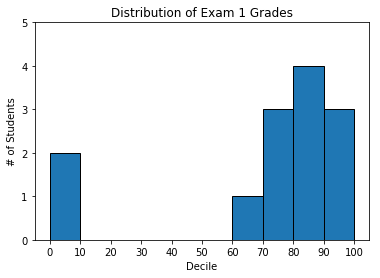

In [17]:
plt.bar([x + 5 for x in histogram.keys()],  # Shift bars right by 5
        histogram.values(),                 # Give each bar its correct height
        10,                                 # Give each bar a width of 10
        edgecolor=(0, 0, 0))                # Black edges for each bar

plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.savefig('images/viz_grades.png')
plt.show();

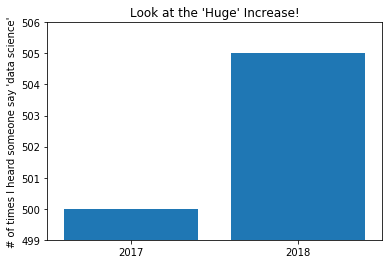

In [18]:
mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")

# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)

# misleading y-axis only shows the part above 500
plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Look at the 'Huge' Increase!")
plt.savefig('images/viz_misleading_y_axis.png')
plt.show();

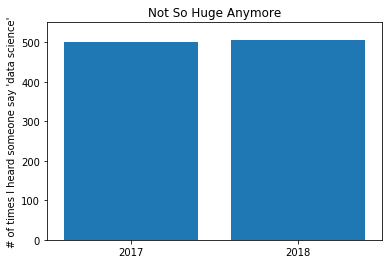

In [19]:
plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
plt.ticklabel_format(useOffset=False)

plt.axis([2016.5, 2018.5, 0, 550])
plt.title("Not So Huge Anymore")
plt.savefig('images/viz_non_misleading_y_axis.png')
plt.show();

## Histograms

To visually explore how the values are distributed (see also Bar Charts above)

In [20]:
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

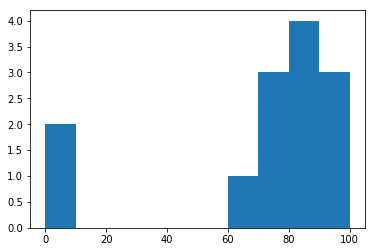

In [21]:
# Divide data into 10 bins (default)
plt.hist(grades)
plt.savefig('images/viz_grades_histogram.png')
plt.show();

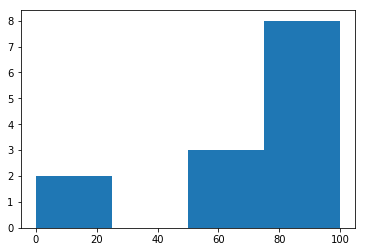

In [22]:
# Divide data into 4 bins
# Too few bins will oversimplify realiuty and won't show you the details.
# Too many bins will overcomplicate reality and won't show the bigger picture.
plt.hist(grades, bins=4)
plt.savefig('images/viz_grades_histogram_bins.png')
plt.show();

## Pyramids

see: https://github.com/afolaborn/Python_Jupyter_Notebook/blob/master/Population-Pyramid/Population_Pyramid_Final.ipynb

## Scatterplots
To visualize the relationship between two paired sets of data.

In [23]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

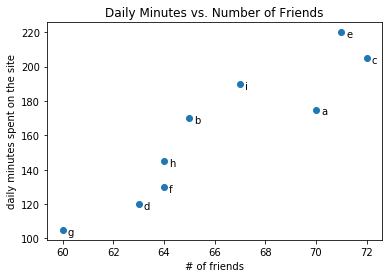

In [24]:
plt.scatter(friends, minutes)

# label each point
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
        xy=(friend_count, minute_count), # Put the label with its point
        xytext=(5, -5),                  # but slightly offset
        textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.savefig('images/viz_scatterplot.png')
plt.show();

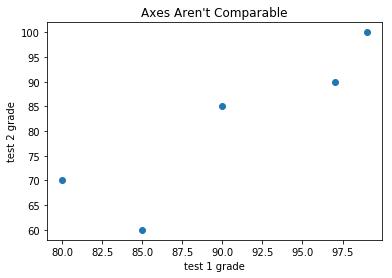

In [25]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.savefig('images/viz_scatterplot_axes_not_comparable.png')
plt.show();

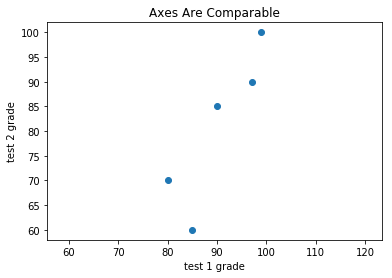

In [26]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Are Comparable")
plt.axis("equal")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.savefig('images/viz_scatterplot_axes_comparable.png')
plt.show();

Logaritmic scale example

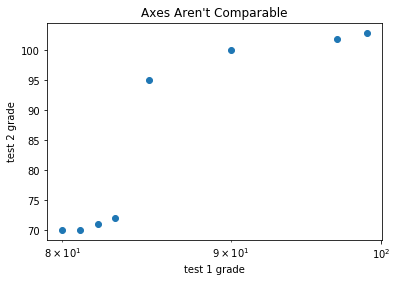

In [27]:
test_1_grades = [ 99, 90, 85, 97, 80, 81, 82, 83]
test_2_grades = [103, 100, 95, 102, 70, 70, 71, 72]

plt.scatter(test_1_grades, test_2_grades)
plt.xscale('log')
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.savefig('images/viz_scatterplot_logaritmic_scale.png')
plt.show();

Dots sizes

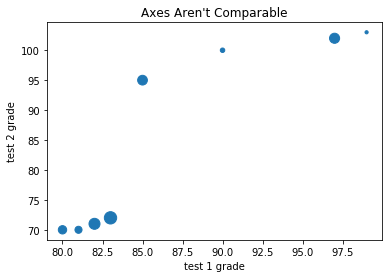

In [28]:
import numpy as np

test_1_grades = [ 99, 90, 85, 97, 80, 81, 82, 83]
test_2_grades = [103, 100, 95, 102, 70, 70, 71, 72]

sizes = [10, 20, 95, 102, 70, 50, 121, 152]

np_test_1_grades = np.array(test_1_grades)
np_test_2_grades = np.array(test_2_grades)

np_sizes = np_test_1_grades + np_test_2_grades + sizes

plt.scatter(test_1_grades, test_2_grades, s=sizes)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.savefig('images/viz_scatterplot_dots_sizes.png')
plt.show();

In [29]:
#colors = [str(item/255.) for item in test_1_grades]
colors = sizes

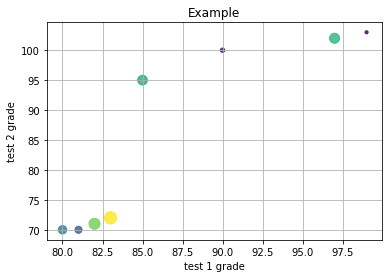

In [30]:
# Scatter plot
plt.scatter(x = test_1_grades, y = test_2_grades, s = sizes, c = colors, alpha = 0.8)

#plt.xscale('log') 
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.title('Example')
#plt.xticks([1000,10000,100000], ['1k','10k','100k'])

# Additional customizations
#plt.text(99, 71, 'Text Label 1')
#plt.text(80, 80, 'Text Label 2')

# Add grid() call
plt.grid(True)

plt.savefig('images/viz_scatterplot_dots_sizes_colors.png')
plt.show()

## Boxplot

To visualize summary statistics (summary statistics visual representation)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/tips5.csv')
print(df.shape)
df.head()

(244, 8)


,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


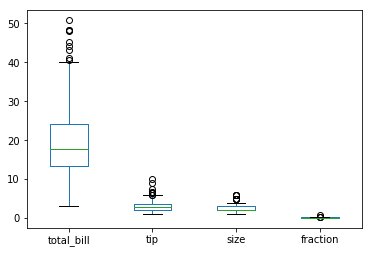

In [32]:
cols = ['total_bill','tip', 'size', 'fraction']
df[cols].plot(kind='box')
plt.show()

## Multiple plots on single axis

It is time now to put together some of what you have learned and combine line plots on a common set of axes. The data set here comes from records of undergraduate degrees awarded to women in a variety of fields from 1970 to 2011. You can compare trends in degrees most easily by viewing two curves on the same set of axes.

Here, three NumPy arrays have been pre-loaded for you: `year` (enumerating years from 1970 to 2011 inclusive), `physical_sciences` (representing the percentage of Physical Sciences degrees awarded to women each in corresponding year), and `computer_science` (representing the percentage of Computer Science degrees awarded to women in each corresponding year).

You will issue two `plt.plot()` commands to draw line plots of different colors on the same set of axes. Here, year represents the x-axis, while `physical_sciences` and `computer_science` are the y-axes.

In [33]:
import numpy as np

year = np.array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011])

physical_sciences = np.array([13.8, 14.9, 14.8, 16.5, 18.2, 19.1, 20. , 21.3, 22.5, 23.7, 24.6,
       25.7, 27.3, 27.6, 28. , 27.5, 28.4, 30.4, 29.7, 31.3, 31.6, 32.6,
       32.6, 33.6, 34.8, 35.9, 37.3, 38.3, 39.7, 40.2, 41. , 42.2, 41.1,
       41.7, 42.1, 41.6, 40.8, 40.7, 40.7, 40.7, 40.2, 40.1])

computer_science = np.array([13.6, 13.6, 14.9, 16.4, 18.9, 19.8, 23.9, 25.7, 28.1, 30.2, 32.5,
       34.8, 36.3, 37.1, 36.8, 35.7, 34.7, 32.4, 30.8, 29.9, 29.4, 28.7,
       28.2, 28.5, 28.5, 27.5, 27.1, 26.8, 27. , 28.1, 27.7, 27.6, 27. ,
       25.1, 22.2, 20.6, 18.6, 17.6, 17.8, 18.1, 17.6, 18.2])

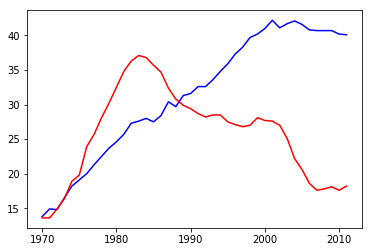

In [34]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')

# Display the plot
plt.show();

It looks like, for the last 25 years or so, more women have been awarded undergraduate degrees in the Physical Sciences than in Computer Science.

## Using axes()

Rather than overlaying line plots on common axes, you may prefer to plot different line plots on distinct axes. The command `plt.axes()` is one way to do this (but it requires specifying coordinates relative to the size of the figure).

Here, you have the same three arrays `year`, `physical_sciences`, and `computer_science` representing percentages of degrees awarded to women over a range of years. You will use `plt.axes()` to create separate sets of axes in which you will draw each line plot.

In calling `plt.axes([xlo, ylo, width, height])`, a set of axes is created and made active with lower corner at coordinates `(xlo, ylo)` of the specified width and height. Note that these coordinates can be passed to `plt.axes()` in the form of a list or a tuple.

The `coordinates` and `lengths` are values between 0 and 1 representing lengths relative to the dimensions of the figure. After issuing a `plt.axes()` command, plots generated are put in that set of axes.

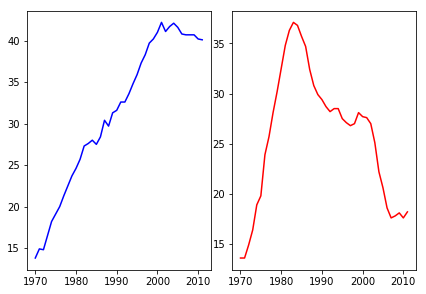

In [35]:
# Create plot axes for the first line plot
# plt.axes([xlo, ylo, width, height])
plt.axes([0.05, 0.05, 0.425, 0.9])

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')

# Create plot axes for the second line plot
plt.axes([0.525, 0.05, 0.425, 0.9])

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')

# Display the plot
plt.show();

As you can see, not only are there now two separate plots with their own axes, but the axes for each plot are slightly different.

## Using subplot() (1)

The command `plt.axes()` requires a lot of effort to use well because the coordinates of the axes need to be set manually. A better alternative is to use `plt.subplot()` to determine the layout automatically.

In this exercise, you will continue working with the same arrays from the previous exercises: `year`, `physical_sciences`, and `computer_science`. Rather than using `plt.axes()` to explicitly lay out the axes, you will use `plt.subplot(m, n, k)` to make the subplot grid of dimensions `m` by `n` and to make the `k`th subplot active (subplots are numbered starting from 1 row-wise from the top left corner of the subplot grid).

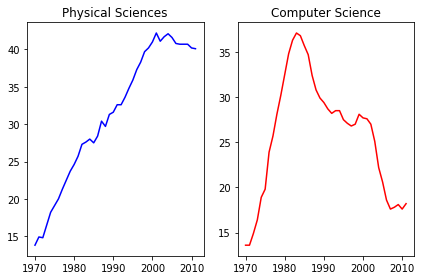

In [36]:
# Create a figure with 1x2 subplot and make the left subplot active
plt.subplot(1, 2, 1)

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Make the right subplot active in the current 1x2 subplot grid
plt.subplot(1, 2, 2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Use plt.tight_layout() to improve the spacing between subplots
plt.tight_layout()
plt.show();

Using subplots like this is a better alternative to using `plt.axes()`.

## Using subplot() (2)

Now you have some familiarity with `plt.subplot()`, you can use it to plot more plots in larger grids of subplots of the same figure.

Here, you will make a 2×2 grid of subplots and plot the percentage of degrees awarded to women in Physical Sciences (using `physical_sciences`), in Computer Science (using `computer_science`), in Health Professions (using `health`), and in Education (using `education`).

In [37]:
health = np.array([77.1, 75.5, 76.9, 77.4, 77.9, 78.9, 79.2, 80.5, 81.9, 82.3, 83.5,
       84.1, 84.4, 84.6, 85.1, 85.3, 85.7, 85.5, 85.2, 84.6, 83.9, 83.5,
       83. , 82.4, 81.8, 81.5, 81.3, 81.9, 82.1, 83.5, 83.5, 85.1, 85.8,
       86.5, 86.5, 86. , 85.9, 85.4, 85.2, 85.1, 85. , 84.8])

education = np.array([74.53532758, 74.14920369, 73.55451996, 73.50181443, 73.33681143,
       72.80185448, 72.16652471, 72.45639481, 73.19282134, 73.82114234,
       74.98103152, 75.84512345, 75.84364914, 75.95060123, 75.86911601,
       75.92343971, 76.14301516, 76.96309168, 77.62766177, 78.11191872,
       78.86685859, 78.99124597, 78.43518191, 77.26731199, 75.81493264,
       75.12525621, 75.03519921, 75.1637013 , 75.48616027, 75.83816206,
       76.69214284, 77.37522931, 78.64424394, 78.54494815, 78.65074774,
       79.06712173, 78.68630551, 78.72141311, 79.19632674, 79.5329087 ,
       79.61862451, 79.43281184])

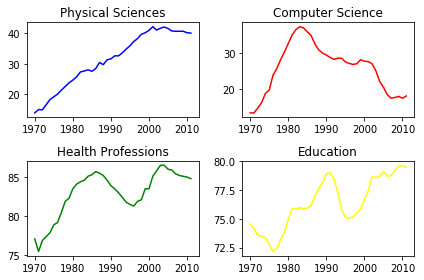

In [38]:
# Create a figure with 2x2 subplot layout and make the top left subplot active
plt.subplot(2, 2, 1)

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Make the top right subplot active in the current 2x2 subplot grid 
plt.subplot(2, 2, 2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Make the bottom left subplot active in the current 2x2 subplot grid
plt.subplot(2, 2, 3)

# Plot in green the % of degrees awarded to women in Health Professions
plt.plot(year, health, color='green')
plt.title('Health Professions')

# Make the bottom right subplot active in the current 2x2 subplot grid
plt.subplot(2, 2, 4)

# Plot in yellow the % of degrees awarded to women in Education
plt.plot(year, education, color='yellow')
plt.title('Education')

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show();

You can use this approach to create subplots in any layout of your choice.

## Using xlim(), ylim()

In this exercise, you will work with the `matplotlib.pyplot` interface to quickly set the x- and y-limits of your plots.

You will now create the same figure as in the previous exercise using `plt.plot()`, this time setting the axis extents using `plt.xlim()` and `plt.ylim()`. These commands allow you to either **zoom or expand the plot or to set the axis ranges to include important values (such as the origin)**.

In this exercise, as before, the percentage of women graduates in Computer Science and in the Physical Sciences are held in the variables `computer_science` and `physical_sciences` respectively over year.

After creating the plot, you will use `plt.savefig()` to export the image produced to a file.

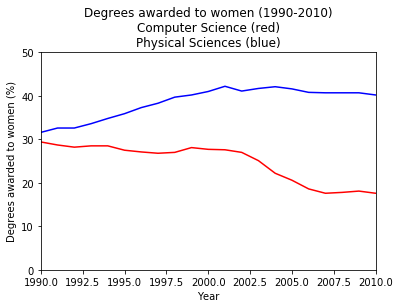

In [39]:
# Plot the % of degrees awarded to women in Computer Science and the Physical Sciences
plt.plot(year,computer_science, color='red') 
plt.plot(year, physical_sciences, color='blue')

# Add the axis labels
plt.xlabel('Year')
plt.ylabel('Degrees awarded to women (%)')

# Set the x-axis range
plt.xlim(1990, 2010)

# Set the y-axis range
plt.ylim(0, 50)

# Add a title
plt.title('Degrees awarded to women (1990-2010)\nComputer Science (red)\nPhysical Sciences (blue)')

# Save the image as 'xlim_and_ylim.png'
plt.savefig('images/xlim_and_ylim.png')

# Display the plot
plt.show();

This plot effectively captures the difference in trends between 1990 and 2010.

## Using axis()

Using `plt.xlim()` and `plt.ylim()` are useful for setting the axis limits individually. In this exercise, you will see how you can pass a 4-tuple to `plt.axis()` to set limits for both axes at once. For example, `plt.axis((1980,1990,0,75))` would set the extent of the x-axis to the period between 1980 and 1990, and would set the y-axis extent from 0 to 75% degrees award.

Once again, the percentage of women graduates in Computer Science and in the Physical Sciences are held in the variables `computer_science` and `physical_sciences` where each value was measured at the corresponding year held in the `year` variable.

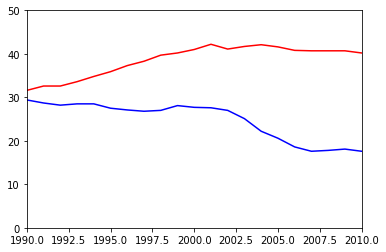

In [40]:
# Plot in blue the % of degrees awarded to women in Computer Science
plt.plot(year,computer_science, color='blue')

# Plot in red the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences,color='red')

# Set the x-axis and y-axis limits
plt.axis((1990,2010,0,50))

# Show the figure
plt.show();

# Save the figure as 'axis_limits.png'
#plt.savefig('images/axis_limits.png')

## Using legend()

Legends are useful for distinguishing between multiple datasets displayed on common axes. The relevant data are created using specific line colors or markers in various plot commands. Using the keyword argument `label` in the plotting function associates a string to use in a legend.

For example, here, you will plot enrollment of women in the Physical Sciences and in Computer Science over time. You can label each curve by passing a label argument to the plotting call, and request a legend using `plt.legend()`. Specifying the keyword argument `loc` determines where the legend will be placed.

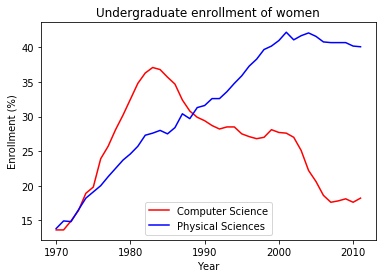

In [41]:
# Specify the label 'Computer Science'
plt.plot(year, computer_science, color='red', label='Computer Science') 

# Specify the label 'Physical Sciences' 
plt.plot(year, physical_sciences, color='blue', label='Physical Sciences')

# Add a legend at the lower center
plt.legend(loc='lower center')

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show();

You should always use axes labels and legends to help make your plots more readable.

## Using annotate()

It is often useful to annotate a simple plot to provide context. This makes the plot more readable and can highlight specific aspects of the data. Annotations like text and arrows can be used to emphasize specific observations.

Here, you will once again plot enrollment of women in the Physical Sciences and Computer science over time. The legend is set up as before. Additionally, you will mark the inflection point when enrollment of women in Computer Science reached a peak and started declining using `plt.annotate()`.

To enable an arrow, set `arrowprops=dict(facecolor='black')`. The arrow will point to the location given by `xy` and the text will appear at the location given by `xytext`.

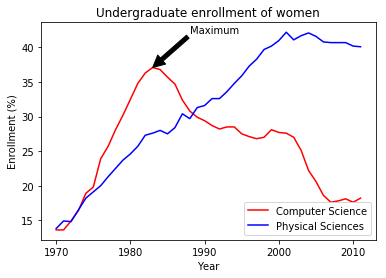

In [42]:
# Plot with legend as before
plt.plot(year, computer_science, color='red', label='Computer Science') 
plt.plot(year, physical_sciences, color='blue', label='Physical Sciences')
plt.legend(loc='lower right')

# Compute the maximum enrollment of women in Computer Science: cs_max
cs_max = computer_science.max()

# Calculate the year in which there was maximum enrollment of women in Computer Science: yr_max
yr_max = year[computer_science.argmax()]

# Add a black arrow annotation
plt.annotate('Maximum', xy=(yr_max, cs_max), xytext=(yr_max+5, cs_max+5), arrowprops=dict(facecolor='black'))

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show();

## Modifying styles

Matplotlib comes with a number of different stylesheets to customize the overall look of different plots. To activate a particular stylesheet you can simply call `plt.style.use()` with the name of the style sheet you want. To list all the available style sheets you can execute: `print(plt.style.available)`.

In [43]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


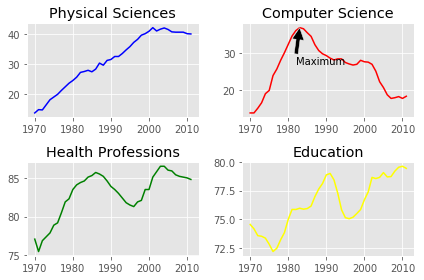

In [44]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Set the style to 'ggplot'
plt.style.use('ggplot')

# Create a figure with 2x2 subplot layout
plt.subplot(2, 2, 1) 

# Plot the enrollment % of women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Plot the enrollment % of women in Computer Science
plt.subplot(2, 2, 2)
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Add annotation
cs_max = computer_science.max()
yr_max = year[computer_science.argmax()]
plt.annotate('Maximum', xy=(yr_max, cs_max), xytext=(yr_max-1, cs_max-10), arrowprops=dict(facecolor='black'))

# Plot the enrollmment % of women in Health professions
plt.subplot(2, 2, 3)
plt.plot(year, health, color='green')
plt.title('Health Professions')

# Plot the enrollment % of women in Education
plt.subplot(2, 2, 4)
plt.plot(year, education, color='yellow')
plt.title('Education')

# Improve spacing between subplots and display them
plt.tight_layout()
plt.show();

## Generating meshes

In order to visualize two-dimensional arrays of data, it is necessary to understand how to generate and manipulate 2-D arrays. Many Matplotlib plots support arrays as input and in particular, they support NumPy arrays. The NumPy library is the most widely-supported means for supporting numeric arrays in Python.

In this exercise, you will use the `meshgrid` function in NumPy to generate 2-D arrays which you will then visualize using `plt.imshow()`. The simplest way to generate a meshgrid is as follows:

In [45]:
import numpy as np
Y,X = np.meshgrid(range(10),range(20))

This will create two arrays with a shape of (20,10), which corresponds to 20 rows along the Y-axis and 10 columns along the X-axis. In this exercise, you will use `np.meshgrid()` to generate a regular 2-D sampling of a mathematical function.

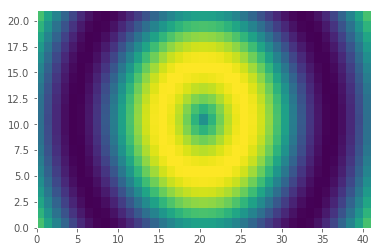

In [46]:
# Import numpy and matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

# Generate two 1-D arrays: u, v
# Generate two one-dimensional arrays u and v using np.linspace(). 
#  The array u should contain 41 values uniformly spaced beween -2 and +2. 
#  The array v should contain 21 values uniformly spaced between -1 and +1.
u = np.linspace(-2, 2, 41)
v = np.linspace(-1, 1, 21)

# Generate 2-D arrays from u and v: X, Y
# The resulting arrays should have shape (41,21)
X,Y = np.meshgrid(u,v)

# Compute Z based on X and Y
Z = np.sin(3*np.sqrt(X**2 + Y**2)) 

# Display the resulting image with pcolor()
plt.pcolor(Z)
plt.show();

# Save the figure to 'sine_mesh.png'
#plt.savefig('sine_mesh.png')

## Array orientation

<img src="images/matrix-01.png" alt="" style="width: 400px;"/>

The commands

- In [1]: plt.pcolor(A, cmap='Blues')
- In [2]: plt.colorbar()
- In [3]: plt.show()

produce the pseudocolor plot above using a Numpy array A. Which of the commands below could have generated A?

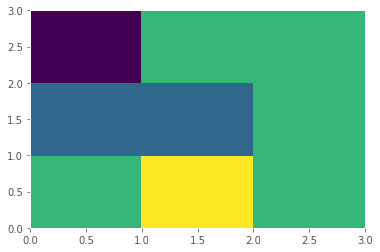

In [47]:
A = np.array([[1, 2, 1], [0, 0, 1], [-1, 1, 1]])
plt.pcolor(A)
plt.show();

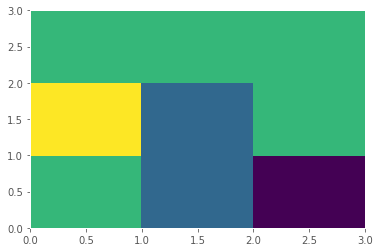

In [48]:
# Correct answer
A = np.array([[1, 0, -1], [2, 0, 1], [1, 1, 1]])
plt.pcolor(A)
plt.show();

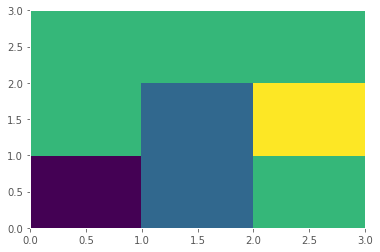

In [49]:
A = np.array([[-1, 0, 1], [1, 0, 2], [1, 1, 1]])
plt.pcolor(A)
plt.show();

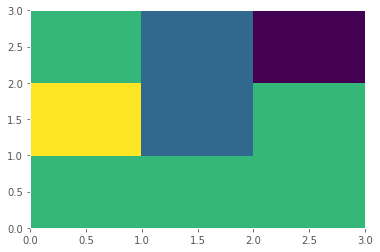

In [50]:
A = np.array([[1, 1, 1], [2, 0, 1], [1, 0, -1]])
plt.pcolor(A)
plt.show();

## Contour & filled contour plots

Although `plt.imshow()` or `plt.pcolor()` are often used to visualize a 2-D array in entirety, there are other ways of visualizing such data without displaying all the available sample values. One option is to use the array to compute contours that are visualized instead.

Two types of contour plot supported by Matplotlib are `plt.contour()` and `plt.contourf()` where the former displays the contours as lines and the latter displayed filled areas between contours. Both these plotting commands accept a two dimensional array from which the appropriate contours are computed.

In this exercise, you will visualize a 2-D array repeatedly using both `plt.contour()` and `plt.contourf()`. You will use `plt.subplot()` to display several contour plots in a common figure, using the meshgrid `X`, `Y` as the axes. For example, `plt.contour(X, Y, Z)` generates a default contour map of the array Z.

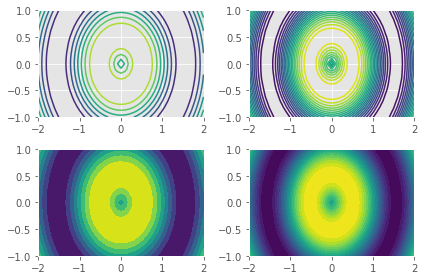

In [51]:
# Generate a default contour map of the array Z
plt.subplot(2,2,1)
plt.contour(X, Y, Z)

# Generate a contour map with 20 contours
plt.subplot(2,2,2)
plt.contour(X, Y, Z, 20)

# Generate a default filled contour map of the array Z
plt.subplot(2,2,3)
plt.contourf(X, Y, Z)

# Generate a default filled contour map with 20 contours
plt.subplot(2,2,4)
plt.contourf(X, Y, Z, 20)

# Improve the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show();

## Modifying colormaps

When displaying a 2-D array with `plt.imshow()` or `plt.pcolor()`, the values of the array are mapped to a corresponding color. The set of colors used is determined by a **colormap** which smoothly maps values to colors, making it easy to understand the structure of the data at a glance.

It is often useful to change the colormap from the default `'jet'` colormap used by matplotlib. A good colormap is visually pleasing and conveys the structure of the data faithfully and in a way that makes sense for the application.

Some matplotlib colormaps have unique names such as `'jet'`, `'coolwarm'`, `'magma'` and `'viridis'`.
Others have a naming scheme based on overall color such as `'Greens'`, `'Blues'`, `'Reds'`, and `'Purples'`.
Another four colormaps are based on the seasons, namely `'summer'`, `'autumn'`, `'winter'` and `'spring'`.
You can insert the option `cmap=<name>` into most matplotlib functions to change the color map of the resulting plot.

In this exercise, you will explore four different colormaps together using `plt.subplot()`. You will use a pregenerated array Z and a meshgrid X, Y to generate the same filled contour plot with four different color maps. Be sure to also add a color bar to each filled contour plot with `plt.colorbar()`.

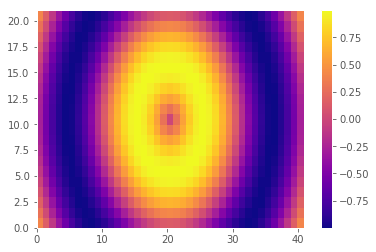

In [52]:
# https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
plt.pcolor(Z, cmap='plasma')
plt.colorbar()
plt.show();

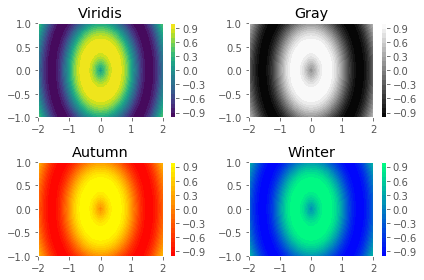

In [53]:
# Create a filled contour plot with a color map of 'viridis'
plt.subplot(2,2,1)
plt.contourf(X,Y,Z,20, cmap='viridis')
plt.colorbar()
plt.title('Viridis')

# Create a filled contour plot with a color map of 'gray'
plt.subplot(2,2,2)
plt.contourf(X,Y,Z,20, cmap='gray')
plt.colorbar()
plt.title('Gray')

# Create a filled contour plot with a color map of 'autumn'
plt.subplot(2,2,3)
plt.contourf(X,Y,Z,20, cmap='autumn')
plt.colorbar()
plt.title('Autumn')

# Create a filled contour plot with a color map of 'winter'
plt.subplot(2,2,4)
plt.contourf(X,Y,Z,20, cmap='winter')
plt.colorbar()
plt.title('Winter')

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show();

## Using hist2d()

Given a set of ordered pairs describing data points, you can count the number of points with similar values to construct a two-dimensional histogram. This is similar to a one-dimensional histogram, but it describes the joint variation of two random variables rather than just one.

In matplotlib, one function to visualize 2-D histograms is `plt.hist2d()`.

- You specify the coordinates of the points using `plt.hist2d(x,y)` assuming x and y are two vectors of the same length.
- You can specify the number of bins with the argument `bins=(nx, ny)` where `nx` is the number of bins to use in the horizontal direction and `ny` is the number of bins to use in the vertical direction.
- You can specify the rectangular region in which the samples are counted in constructing the 2D histogram. The optional parameter required is `range=((xmin, xmax), (ymin, ymax))` where
    - `xmin` and `xmax` are the respective lower and upper limits for the variables on the x-axis and
    - `ymin` and `ymax` are the respective lower and upper limits for the variables on the y-axis. Notice that the optional range argument can use nested tuples or lists.

In this exercise, you'll use some data from the `auto-mpg` data set. There are two arrays `mpg` and `hp` that respectively contain miles per gallon and horse power ratings from over three hundred automobiles built.

In [54]:
# miles per gallon (distance)
mpg = np.array([18. ,  9. , 36.1, 18.5, 34.3, 32.9, 32.2, 22. , 15. , 17. , 44. ,
       24.5, 32. , 14. , 15. , 13. , 36. , 31. , 32. , 21.5, 19. , 17. ,
       16. , 15. , 23. , 26. , 32. , 24. , 21. , 31.3, 32.7, 15. , 23. ,
       17.6, 28. , 24. , 14. , 18.1, 36. , 29. , 35.1, 36. , 16.5, 16. ,
       29.9, 31. , 27.2, 14. , 32.1, 15. , 12. , 17.6, 25. , 28.4, 29. ,
       30.9, 20. , 20.8, 22. , 38. , 31. , 19. , 16. , 25. , 22. , 26. ,
       13. , 19.9, 11. , 28. , 15.5, 26. , 14. , 12. , 24.2, 25. , 22.5,
       26.8, 23. , 26. , 30.7, 31. , 27.2, 21.5, 29. , 20. , 13. , 14. ,
       38. , 13. , 24.5, 13. , 25. , 24. , 34.1, 13. , 44.6, 20.5, 18. ,
       23.2, 20. , 24. , 25.5, 36.1, 23. , 24. , 18. , 26.6, 32. , 20.3,
       27. , 17. , 21. , 13. , 24. , 17. , 39.1, 14.5, 13. , 20.2, 27. ,
       35. , 15. , 36.4, 30. , 31.9, 26. , 16. , 20. , 18.6, 14. , 25. ,
       33. , 14. , 18.5, 37.2, 18. , 44.3, 18. , 28. , 43.4, 20.6, 19.2,
       26.4, 18. , 28. , 26. , 13. , 25.8, 28.1, 13. , 16.5, 31.5, 24. ,
       15. , 18. , 33.5, 32.4, 27. , 13. , 31. , 28. , 27.2, 21. , 19. ,
       25. , 23. , 19. , 15.5, 23.9, 22. , 29. , 14. , 15. , 27. , 15. ,
       30.5, 25. , 17.5, 34. , 38. , 30. , 19.8, 25. , 21. , 26. , 16.5,
       18.1, 46.6, 21.5, 14. , 21.6, 15.5, 20.5, 23.9, 12. , 20.2, 34.4,
       23. , 24.3, 19. , 29. , 23.5, 34. , 37. , 33. , 18. , 15. , 34.7,
       19.4, 32. , 34.1, 33.7, 20. , 15. , 38.1, 26. , 27. , 16. , 17. ,
       13. , 28. , 14. , 31.5, 34.5, 11. , 16. , 31.6, 19.1, 18.5, 15. ,
       18. , 35. , 20.2, 13. , 31. , 22. , 11. , 33.5, 43.1, 25.4, 40.8,
       14. , 29.8, 16. , 20.6, 18. , 33. , 31.8, 13. , 20. , 32. , 13. ,
       23.7, 19.2, 37. , 18. , 19. , 32.3, 18. , 13. , 12. , 36. , 18.2,
       19. , 30. , 15. , 11. , 10. , 16. , 14. , 16.9, 13. , 25. , 21. ,
       21.1, 26. , 28. , 29. , 16. , 26.6, 19. , 32.8, 22. , 19. , 31. ,
       23. , 29.5, 17.5, 19. , 24. , 14. , 28. , 21. , 22.4, 36. , 18. ,
       16.2, 39.4, 30. , 18. , 17.5, 28.8, 22. , 34.2, 30.5, 16. , 38. ,
       41.5, 27.9, 22. , 29.8, 17.7, 15. , 14. , 15.5, 17.5, 12. , 29. ,
       15.5, 35.7, 26. , 30. , 33.8, 18. , 13. , 20. , 32.4, 16. , 27.5,
       23. , 14. , 17. , 16. , 23. , 24. , 27. , 15. , 27. , 28. , 14. ,
       33.5, 39. , 24. , 26.5, 19.4, 15. , 25.5, 14. , 27.4, 13. , 19. ,
       17. , 28. , 22. , 30. , 18. , 14. , 22. , 23.8, 24. , 26. , 26. ,
       30. , 29. , 14. , 25.4, 19. , 12. , 20. , 27. , 22.3, 10. , 19.2,
       26. , 16. , 37.3, 26. , 20.2, 13. , 21. , 25. , 20.5, 37.7, 36. ,
       20. , 37. , 18. , 27. , 29.5, 17.5, 25.1])
 
# horse power
hp = np.array([ 88, 193,  60,  98,  78, 100,  75,  76, 130, 140,  52,  88,  84,
       148, 150, 130,  58,  82,  65, 110,  95, 110, 140, 170,  78,  90,
        96,  95, 110,  75, 132, 150,  83,  85,  86,  75, 140, 139,  70,
        52,  60,  84, 138, 180,  65,  67,  97, 150,  70, 100, 180, 129,
        95,  90,  83,  75, 100,  85, 112,  67,  65,  88, 100,  75, 100,
        70, 145, 110, 210,  80, 145,  69, 150, 198, 120,  92,  90, 115,
        95,  75,  76,  67,  71, 115,  84,  91, 150, 215,  67, 175,  60,
       175, 110,  95,  68, 150,  67,  95, 110, 105, 102, 110,  89,  66,
        88,  75,  78, 105,  70, 103,  60, 150,  72, 170,  90, 110,  58,
       152, 145, 139,  83,  69, 150,  67,  80,  71,  46, 105,  90, 110,
       175,  80,  74, 150, 150,  65, 100,  48, 105,  90,  48, 105, 105,
        88, 100,  75, 113, 190,  92,  80, 165, 180,  71,  97,  72, 105,
        90,  75,  88, 155,  68,  90,  84,  87, 112,  87, 125, 108, 142,
        97, 105,  75, 137, 150,  88, 145,  63,  95, 140,  88,  85,  70,
        85, 115,  86,  79, 120, 120,  65, 110, 220, 115, 170, 100,  90,
       225,  85,  65,  97,  90,  90,  49, 110,  70,  92,  53, 100, 190,
        63,  90,  67,  65,  75, 100, 110,  60,  93,  88, 150, 100, 150,
        88, 225,  68,  70, 208, 105,  74,  90, 110,  72,  97,  88,  88,
       129,  85,  86, 150,  70,  48,  77,  65, 175,  90, 150, 110, 130,
        53,  65, 158,  95,  61, 215, 100, 145,  68, 150,  88,  67, 105,
       175, 160,  74, 135, 100,  67, 198, 180, 215, 100, 225, 155, 170,
        81,  85,  95,  80,  92,  70, 149,  84,  97,  52,  72,  85,  52,
        95,  71, 140, 100,  96, 150,  75, 107, 110,  75,  97, 133,  70,
        67, 112, 145, 115,  98,  70,  78, 230,  63,  76, 105,  95,  62,
       165, 165, 160, 190,  95, 180,  78, 120,  80,  75,  68,  67,  95,
       140, 110,  72, 150,  95,  54, 153, 130, 170,  86,  97,  90, 145,
        86,  79, 165,  83,  64,  92,  72, 140, 150,  96, 150,  80, 130,
       100, 125,  90,  94,  76,  90, 150,  97,  85,  81,  78,  46,  84,
        70, 153, 116, 100, 167,  88,  88,  88, 200, 125,  92, 110,  69,
        67,  90, 150,  90,  71, 105,  62,  88, 122,  65,  88,  90,  68,
       110,  88])

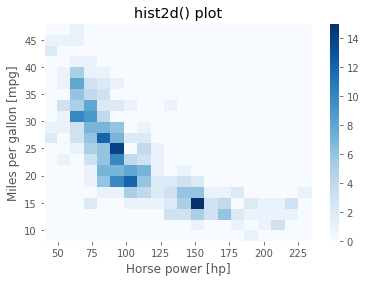

In [55]:
# Generate a 2-D histogram
# Generate a two-dimensional histogram to view the joint variation of the mpg and hp arrays.
#  - Put hp along the horizontal axis and mpg along the vertical axis.
#  - Specify 20 by 20 rectangular bins with the bins argument.
#  - Specify the region covered with the optional range argument 
#    so that the plot samples hp between 40 and 235 on the x-axis 
#    and mpg between 8 and 48 on the y-axis.
plt.hist2d(hp, mpg, bins=(20,20), range=((40, 235), (8, 48)), cmap='Blues')

# Add a color bar to the histogram
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hist2d() plot')
plt.show();

## Using hexbin()

The function `plt.hist2d()` uses rectangular bins to construct a two dimensional histogram. As an alternative, the function `plt.hexbin()` uses hexagonal bins. The underlying algorithm (based on [this article from 1987](https://amstat.tandfonline.com/doi/abs/10.1080/01621459.1987.10478445#.XWvhO5MzZ0s)) constructs a hexagonal tesselation of a planar region and aggregates points inside hexagonal bins.

The optional `gridsize` argument (default 100) gives the number of hexagons across the x-direction used in the hexagonal tiling. If specified as a list or a tuple of length two, `gridsize` fixes the number of hexagon in the x- and y-directions respectively in the tiling.

The optional parameter `extent=(xmin, xmax, ymin, ymax)` specifies rectangular region covered by the hexagonal tiling. In that case, `xmin` and `xmax` are the respective lower and upper limits for the variables on the x-axis and `ymin` and `ymax` are the respective lower and upper limits for the variables on the y-axis.

In this exercise, you'll use the same auto-mpg data as in the last exercise (again using arrays `mpg` and `hp`). This time, you'll use `plt.hexbin()` to visualize the two-dimensional histogram.

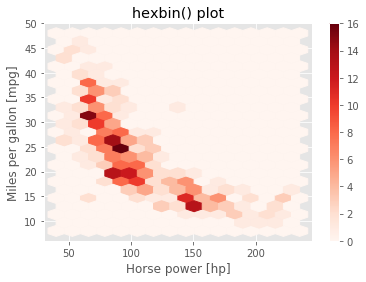

In [56]:
# Generate a 2d histogram with hexagonal bins
plt.hexbin(hp, mpg, gridsize=(15,12), extent=(40, 235, 8, 48), cmap='Reds')

           
# Add a color bar to the histogram
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hexbin() plot')
plt.show();

## Loading, examining images

Color images such as photographs contain the intensity of the red, green and blue color channels.

To read an image from file, use `plt.imread()` by passing the path to a file, such as a PNG or JPG file.
The color image can be plotted as usual using `plt.imshow()`.

The resulting image loaded is a NumPy array of three dimensions. The array typically has dimensions `M×N×3`, where `M×N` is the dimensions of the image. The third dimensions are referred to as color channels (typically red, green, and blue). The color channels can be extracted by Numpy array slicing.

In this exercise, you will load & display an [image of an astronaut (by NASA (Public domain)](https://en.wikipedia.org/wiki/File:Bruce_McCandless_II_during_EVA_in_1984.jpg), via Wikimedia Commons). You will also examine its attributes to understand how color images are represented.

(1200, 1200, 3)


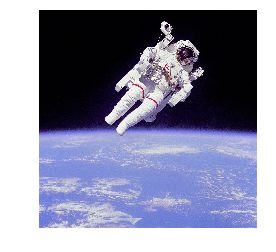

In [57]:
# Load the image into an array: img
img = plt.imread('images/1200px-Bruce_McCandless_II_during_EVA_in_1984.jpg')

# Print the shape of the image
print(img.shape)

# Display the image
plt.imshow(img)

# Hide the axes
plt.axis('off')
plt.show();

This image is represented as a 3D array. As you can see in the IPython Shell, its shape is `(480, 480, 3)`.

## Pseudocolor plot from image data

Image data comes in many forms and it is not always appropriate to display the available channels in RGB space. In many situations, an image may be processed and analysed in some way before it is visualized in **pseudocolor**, also known as **'false' color**.

In this exercise, you will perform a simple analysis using the image showing an astronaut as viewed from space. Instead of simply displaying the image, you will compute the total intensity across the red, green and blue channels. The result is a single two dimensional array which you will display using `plt.imshow()` with the `'gray'` colormap.

(1200, 1200, 3)
(1200, 1200)


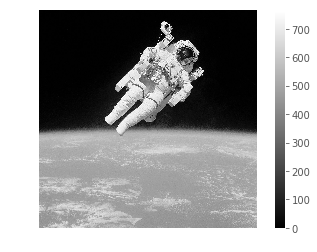

In [58]:
# Load the image into an array: img
img = plt.imread('images/1200px-Bruce_McCandless_II_during_EVA_in_1984.jpg')

# Print the shape of the image
print(img.shape)

# Compute the sum of the red, green and blue channels: intensity
intensity = img.sum(axis=2)

# Print the shape of the intensity
print(intensity.shape)

# Display the intensity with a colormap of 'gray'
plt.imshow(intensity, cmap='gray')

# Add a colorbar
plt.colorbar()

# Hide the axes and show the figure
plt.axis('off')
plt.show();

## Extent and aspect

When using `plt.imshow()` to display an array, the default behavior is to keep pixels square so that the height to width ratio of the output matches the ratio determined by the shape of the array. In addition, by default, the x- and y-axes are labeled by the number of samples in each direction.

The ratio of the displayed width to height is known as the **image aspect** and the range used to label the x- and y-axes is known as the **image extent**. The default aspect value of 'auto' keeps the pixels square and the extents are automatically computed from the shape of the array if not specified otherwise.

In this exercise, you will investigate how to set these options explicitly by plotting the same image in a 2 by 2 grid of subplots with distinct aspect and extent options.

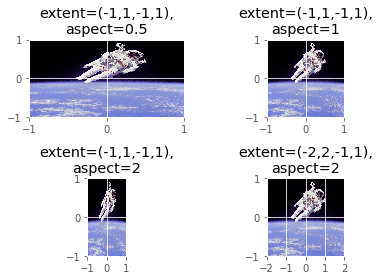

In [59]:
# Load the image into an array: img
img = plt.imread('images/1200px-Bruce_McCandless_II_during_EVA_in_1984.jpg')

# Specify the extent and aspect ratio of the top left subplot
plt.subplot(2,2,1)
plt.title('extent=(-1,1,-1,1),\naspect=0.5') 
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=0.5)

# Specify the extent and aspect ratio of the top right subplot
plt.subplot(2,2,2)
plt.title('extent=(-1,1,-1,1),\naspect=1')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=1)

# Specify the extent and aspect ratio of the bottom left subplot
plt.subplot(2,2,3)
plt.title('extent=(-1,1,-1,1),\naspect=2')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=2)

# Specify the extent and aspect ratio of the bottom right subplot
plt.subplot(2,2,4)
plt.title('extent=(-2,2,-1,1),\naspect=2')
plt.xticks([-2,-1,0,1,2])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-2,2,-1,1), aspect=2)

# Improve spacing and display the figure
plt.tight_layout()
plt.show();

## Rescaling pixel intensities

Sometimes, low contrast images can be improved by rescaling their intensities. For instance, this [image of Hawkes Bay, New Zealand](https://commons.wikimedia.org/wiki/File:Unequalized_Hawkes_Bay_NZ.jpg) (originally by Phillip Capper, modified by User:Konstable, via Wikimedia Commons, CC BY 2.0) has no pixel values near 0 or near 255 (the limits of valid intensities).

For this exercise, you will do a simple rescaling (remember, an image is NumPy array) to translate and stretch the pixel intensities so that the intensities of the new image fill the range from 0 to 255.

The smallest & largest pixel intensities are 114 & 208.
The rescaled smallest & largest pixel intensities are 0.0 & 256.0.


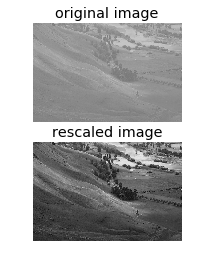

In [60]:
# Load the image into an array: image
image = plt.imread('images/Unequalized_Hawkes_Bay_NZ.jpg')

# Extract minimum and maximum values from the image: pmin, pmax
pmin, pmax = image.min(), image.max()
print("The smallest & largest pixel intensities are %d & %d." % (pmin, pmax))

# Rescale the pixels: rescaled_image
rescaled_image = 256*(image - pmin) / (pmax - pmin)
print("The rescaled smallest & largest pixel intensities are %.1f & %.1f." % 
      (rescaled_image.min(), rescaled_image.max()))

# Display the original image in the top subplot
plt.subplot(2,1,1)
plt.title('original image')
plt.axis('off')
plt.imshow(image)

# Display the rescaled image in the bottom subplot
plt.subplot(2,1,2)
plt.title('rescaled image')
plt.axis('off')
# https://stackoverflow.com/questions/49643907/clipping-input-data-to-the-valid-range-for-imshow-with-rgb-data-0-1-for-floa
plt.imshow(rescaled_image.astype(np.uint8))

plt.show();

As you can see, the rescaled image has pixel intensities in between 0 and 256.

In [61]:
plt.style.use('seaborn')

# Seaborn

## Simple linear regressions

`seaborn` provides a convenient interface to generate complex and great-looking statistical plots. One of the simplest things you can do using seaborn is to fit and visualize a **simple linear regression between two variables** using `sns.lmplot()`.

One difference between `seaborn` and regular matplotlib plotting is that **you can pass pandas DataFrames directly to the plot and refer to each column by name**. For example, if you were to plot the column `'price'` vs the column `'area'` from a DataFrame `df`, you could call `sns.lmplot(x='area', y='price', data=df)`.

In this exercise, you will once again use the DataFrame auto containing the auto-mpg dataset. You will plot a linear regression illustrating the relationship between automobile weight and horse power.

In [62]:
import pandas as pd
auto = pd.read_csv('data/dc12/auto-mpg.csv')

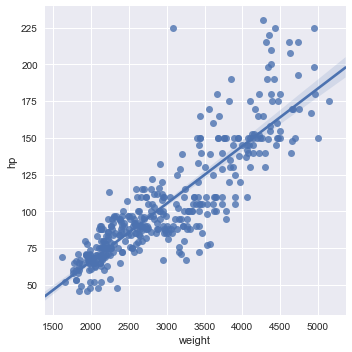

In [63]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x='weight', y='hp', data=auto)

# Display the plot
plt.show();

Unsurprisingly, there is a strong correlation between 'hp' and 'weight', and a linear regression is easily able to capture this trend.

## Plotting residuals of a regression

Often, you don't just want to see the regression itself but also see the **residuals to get a better idea how well the regression captured the data**. Seaborn provides `sns.residplot()` for that purpose, visualizing how far datapoints diverge from the regression line.

In this exercise, you will visualize the **residuals of a regression** between the `'hp'` column (horse power) and the `'mpg'` column (miles per gallon) of the `auto` DataFrame used previously.

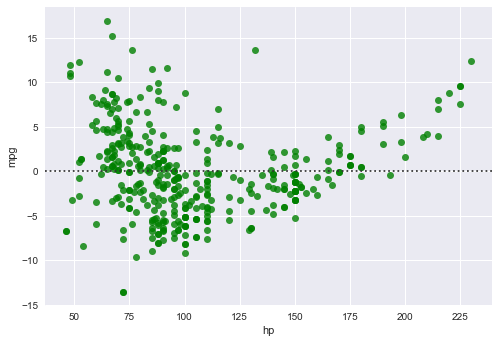

In [64]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a green residual plot of the regression between 'hp' and 'mpg'
sns.residplot(x='hp', y='mpg', data=auto, color='green')

# Display the plot
plt.show();

## Higher-order regressions

When there are more complex relationships between two variables, a simple first order regression is often not sufficient to accurately capture the relationship between the variables. **Seaborn makes it simple to compute and visualize regressions of varying orders**.

Here, you will plot a second order regression between the horse power ('hp') and miles per gallon ('mpg') using `sns.regplot()` (the function `sns.lmplot()` is a higher-level interface to `sns.regplot()`). However, before plotting this relationship, compare how the residual changes depending on the order of the regression. Does a second order regression perform significantly better than a simple linear regression?

A principal difference between `sns.lmplot()` and `sns.regplot()` is the way in which matplotlib options are passed (`sns.regplot()` is more permissive). For both `sns.lmplot()` and `sns.regplot()`, the keyword order is used to control the order of polynomial regression.

The function `sns.regplot()` uses the argument `scatter=None` to prevent plotting the scatter plot points again.

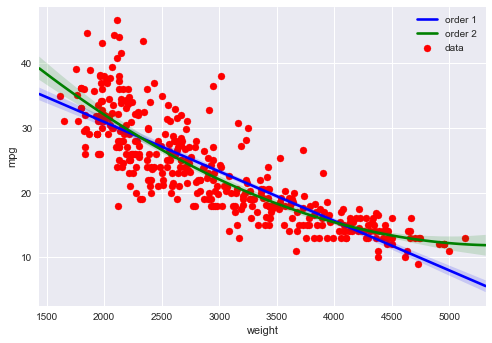

In [65]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto['weight'], auto['mpg'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, color='blue', scatter=None, label='order 1')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, color='green', scatter=None, label='order 2', order=2)

# Plot in green a linear regression of order 3 between 'weight' and 'mpg'
#sns.regplot(x='weight', y='mpg', data=auto, color='yellow', scatter=None, label='order 3', order=3)

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show();

It seems like a regression of order 2 is necessary to properly capture the relationship between 'weight' and 'mpg'.

## Grouping linear regressions by hue

Often it is useful to compare and contrast trends between different groups. Seaborn makes it possible to apply linear regressions separately for subsets of the data by applying a groupby operation. Using the `hue` argument, you can specify a categorical variable by which to group data observations. The distinct groups of points are used to produce distinct regressions with different `hues` in the plot.

In the automobile dataset - which has been pre-loaded here as `auto` - you can view the relationship between weight ('weight') and horsepower ('hp') of the cars and group them by their origin ('origin'), giving you a quick visual indication how the relationship differs by continent.

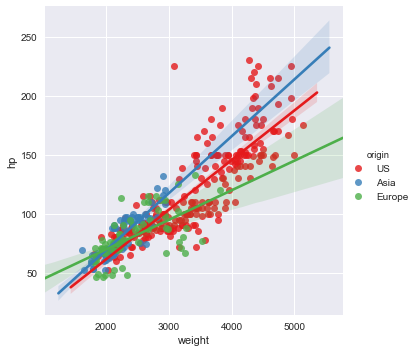

In [66]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x='weight', y='hp', data=auto, hue='origin', palette='Set1')

# Display the plot
plt.show();

## Grouping linear regressions by row or column

Rather than overlaying linear regressions of grouped data in the same plot, we may want to use a grid of subplots. The `sns.lmplot()` accepts the arguments row and/or col to arrangements of subplots for regressions.

You'll use the automobile dataset again and, this time, you'll use the keyword argument `row` to display the subplots organized in rows. That is, you'll produce horsepower vs. weight regressions grouped by continent of origin in separate subplots stacked vertically.

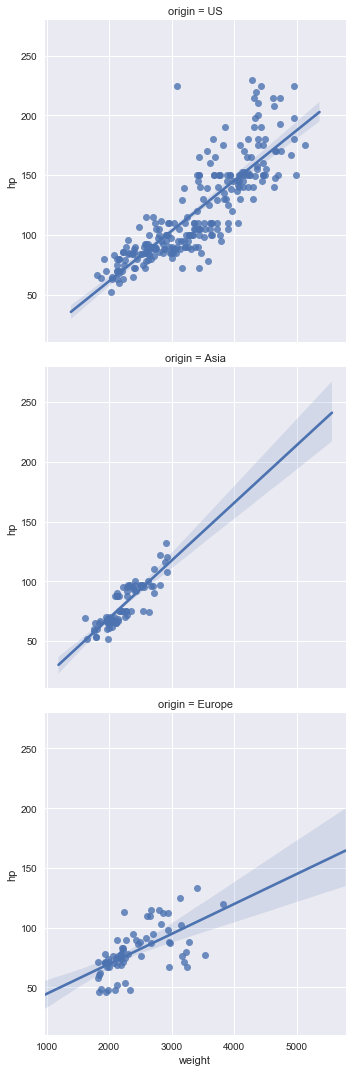

In [67]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(x='weight', y='hp', data=auto, row='origin', palette='Set1')

# Display the plot
plt.show();

## Constructing strip plots

Regressions are useful to understand relationships between two continuous variables. **Often we want to explore how the distribution of a single continuous variable is affected by a second categorical variable**. Seaborn provides a variety of plot types to perform these types of comparisons between univariate distributions.

The `strip plot` is one way of visualizing this kind of data. It plots the distribution of variables for each category as individual datapoints. For vertical strip plots (the default), distributions of continuous values are laid out parallel to the y-axis and the distinct categories are spaced out along the x-axis.

- For example, `sns.stripplot(x='type', y='length', data=df)` produces a sequence of vertical strip plots of length distributions grouped by type (assuming length is a continuous column and type is a categorical column of the DataFrame df).
- Overlapping points can be difficult to distinguish in strip plots. The argument `jitter=True` helps spread out overlapping points.
- Other matplotlib arguments can be passed to `sns.stripplot()`, e.g., marker, color, size, etc.

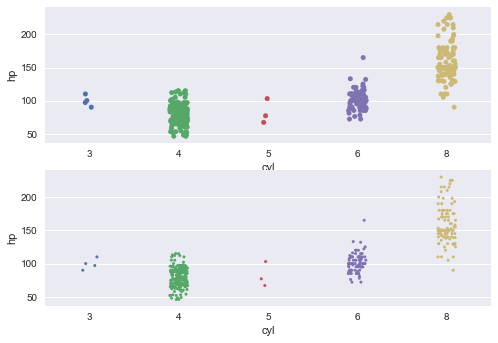

In [68]:
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplot(2,1,1)
sns.stripplot(x='cyl', y='hp', data=auto)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x='cyl', y='hp', data=auto, jitter=True, size=3)

# Display the plot
plt.show();

Here, `'hp'` is the **continuous variable**, and `'cyl'` is the **categorical variable**. The strip plot shows that automobiles with more cylinders tend to have higher horsepower.

## Constructing swarm plots

A `strip plot` can be visually crowded even with `jitter` applied and smaller point `sizes`. An alternative is provided by the `swarm plot` (`sns.swarmplot()`), which is very similar but spreads out the points to avoid overlap and provides a better visual overview of the data.

The syntax for `sns.swarmplot()` is similar to that of `sns.stripplot()`, e.g., `sns.swarmplot(x='type', y='length', data=df)`.
- The orientation for the continuous variable in the strip/swarm plot can be inferred from the choice of the columns x and y from the DataFrame data. The orientation can be set explicitly using `orient='h'` (horizontal) or `orient='v'` (vertical).
- Another grouping can be added in using the `hue` keyword. For instance, using `sns.swarmplot(x='type', y='length', data=df, hue='build year')` makes a swarm plot from the DataFrame `df` with the 'length' column values spread out vertically, horizontally grouped by the column 'type' and each point colored by the categorical column 'build year'.

In this exercise, you'll use the `auto` DataFrame again to illustrate the use of `sns.swarmplot()` with grouping by `hue` and with explicit specification of the orientation using the keyword `orient`.

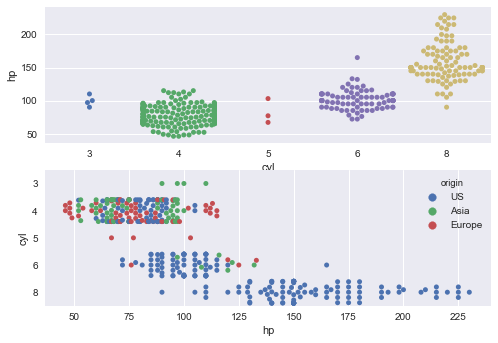

In [69]:
# Generate a swarm plot of 'hp' grouped horizontally by 'cyl'  
plt.subplot(2,1,1)
sns.swarmplot(x='cyl', y='hp', data=auto)

# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
plt.subplot(2,1,2)
sns.swarmplot(x='hp', y='cyl', data=auto, hue='origin', orient='h')

# Display the plot
plt.show();

Swarm plots are generally easier to understand than strip plots because they spread out the points to avoid overlap.

## Constructing violin plots

Both strip and swarm plots visualize all the datapoints. For large datasets, this can result in significant overplotting. Therefore, it is often useful to use plot types which reduce a dataset to more descriptive statistics and provide a good summary of the data. `Box and whisker` plots are a classic way of summarizing univariate distributions but seaborn provides a more sophisticated extension of the standard box plot, called a `violin plot`.

Here, you will produce `violin plots` of the distribution of horse power ('hp') by the number of cylinders ('cyl'). Additionally, you will combine two different plot types by overlaying a strip plot on the `violin plot`.

As before, the DataFrame has been pre-loaded for you as `auto`.

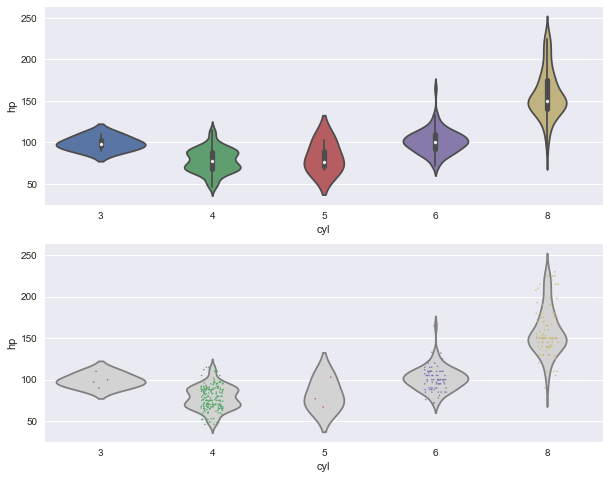

In [70]:
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
sns.violinplot(x='cyl', y='hp', data=auto)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x='cyl', y='hp', data=auto, color='lightgray', inner=None)

# Overlay a strip plot on the violin plot
sns.stripplot(x='cyl', y='hp', data=auto, jitter=True, size=1.5)

# Display the plot
plt.show();

As you can see, **violin plots are a nice way of visualizing the relationship between a continuous variable and a categorical variable**.

## Plotting joint distributions (1)

There are numerous strategies to visualize how pairs of continuous random variables vary jointly. Regression and residual plots are one strategy. Another is to **visualize a bivariate distribution**.

Seaborn's `sns.jointplot()` provides means of **visualizing bivariate distributions**. The basic calling syntax is similar to that of `sns.lmplot()`. By default, calling `sns.jointplot(x, y, data)` renders a few things:

- A scatter plot using the specified columns x and y from the DataFrame data.
- A (univariate) histogram along the top of the scatter plot showing distribution of the column x.
- A (univariate) histogram along the right of the scatter plot showing distribution of the column y.

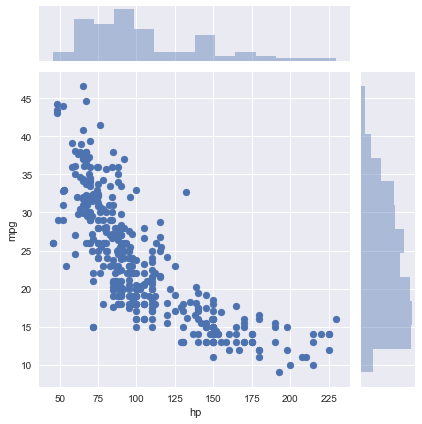

In [71]:
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot(x='hp', y='mpg', data=auto)

# Display the plot
plt.show();

## Plotting joint distributions (2)

The seaborn function `sns.jointplot()` has a parameter `kind` to specify how to visualize the joint variation of two continuous random variables (i.e., two columns of a DataFrame)

- kind='scatter' uses a scatter plot of the data points
- kind='reg' uses a regression plot (default order 1)
- kind='resid' uses a residual plot
- kind='kde' uses a kernel density estimate of the joint distribution
- kind='hex' uses a hexbin plot of the joint distribution

For this exercise, you will again use `sns.jointplot()` to display the joint distribution of the hp and mpg columns of the auto DataFrame. This time, you will use `kind='hex'` to generate a hexbin plot of the joint distribution.

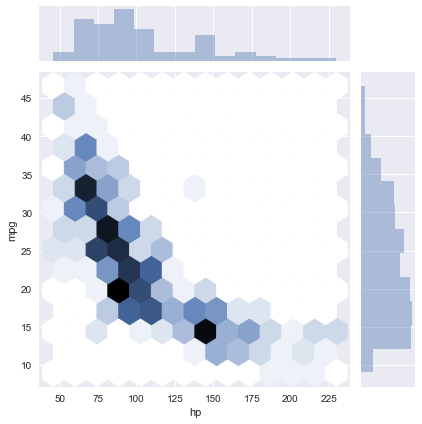

In [72]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x='hp', y='mpg', data=auto, kind='hex')

# Display the plot
plt.show();

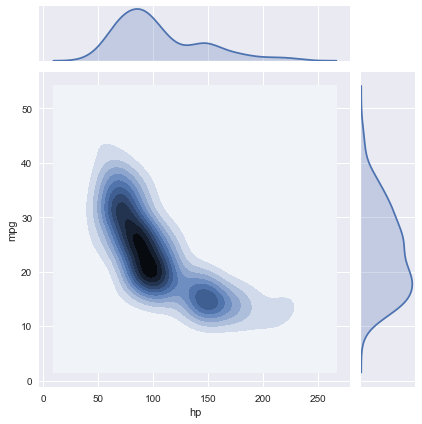

In [73]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x='hp', y='mpg', data=auto, kind='kde')

# Display the plot
plt.show();

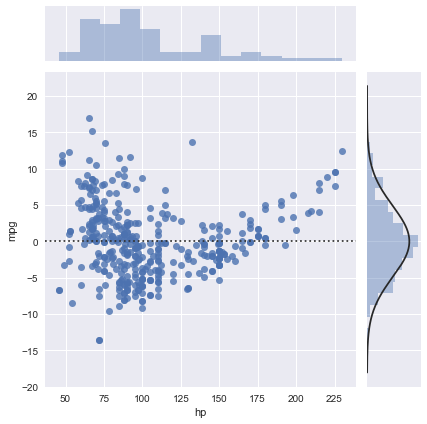

In [74]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x='hp', y='mpg', data=auto, kind='resid')

# Display the plot
plt.show();

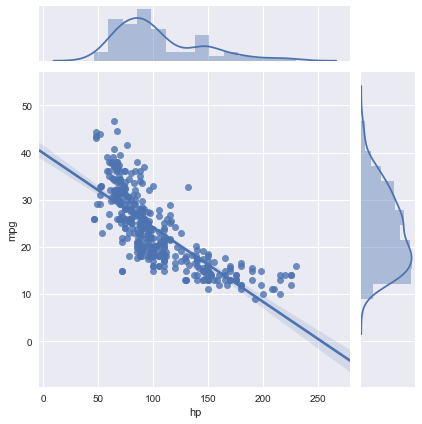

In [75]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x='hp', y='mpg', data=auto, kind='reg')

# Display the plot
plt.show();

## Plotting distributions pairwise (1)

Data sets often contain more than two continuous variables. The function `sns.jointplot()` is restricted to representing joint variation between only two quantities (i.e., two columns of a DataFrame). Visualizing multivariate relationships is trickier.

The function `sns.pairplot()` constructs a grid of all joint plots pairwise from all pairs of (**non-categorical**) columns in a DataFrame. The syntax is very simple: `sns.pairplot(df)`, where `df` is a DataFrame. The **non-categorical columns** are identified and the corresponding joint plots are plotted in a square grid of subplots. The diagonal of the subplot grid shows the univariate histograms of the individual columns.

In this exercise, you will use a DataFrame `auto` comprising only three columns from the original auto-mpg data set.

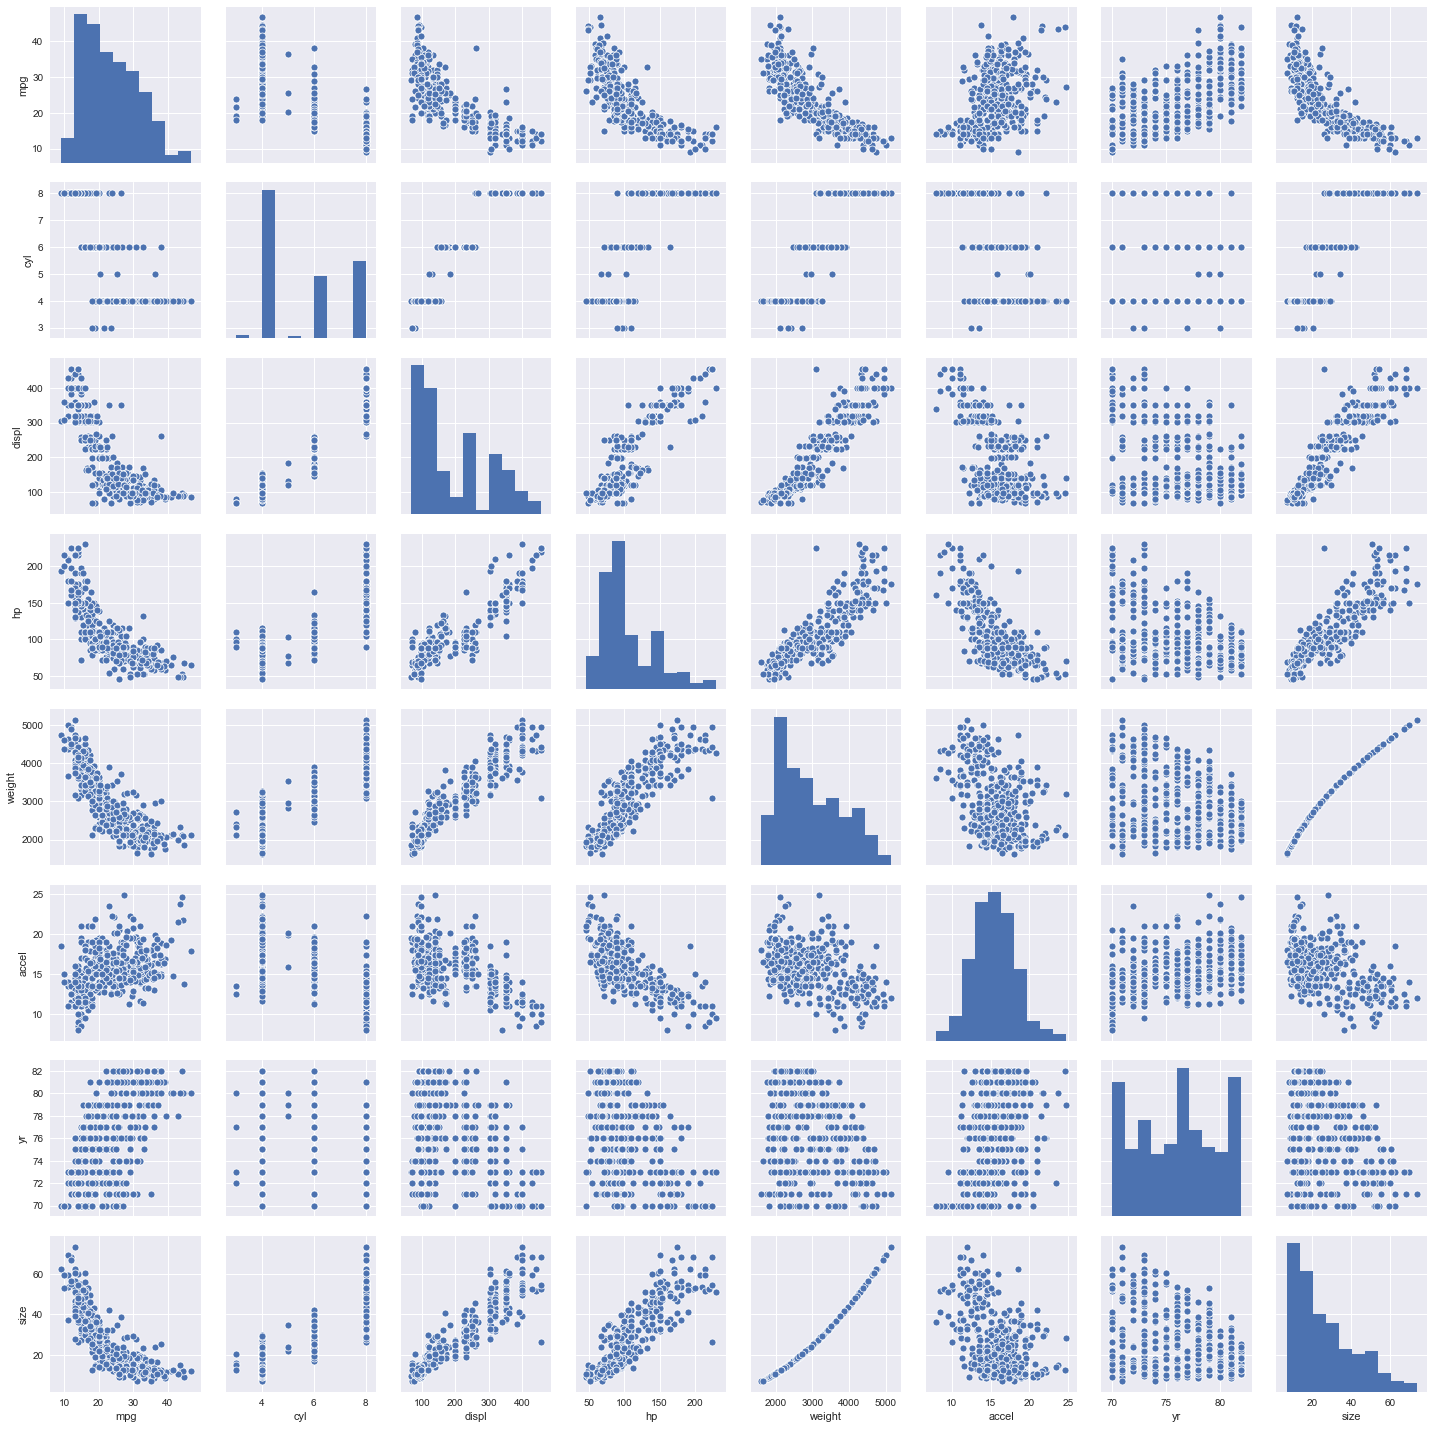

In [76]:
# Print the first 5 rows of the DataFrame
auto.head()

# Plot the pairwise joint distributions from the DataFrame 
sns.pairplot(auto)

# Display the plot
plt.show();

Seaborn's pairplots are an excellent way of visualizing the **relationship between all continuous variables** in a dataset.

## Plotting distributions pairwise (2)

In this exercise, you will generate pairwise joint distributions again. This time, you will make two particular additions:

- You will display regressions as well as scatter plots in the off-diagonal subplots. You will do this with the argument `kind='reg'` (where 'reg' means 'regression'). Another option for kind is `'scatter'` (the default) that plots scatter plots in the off-diagonal subplots.
- You will also visualize the joint distributions separated by continent of origin. You will do this with the keyword argument `hue` specifying the `'origin'`.

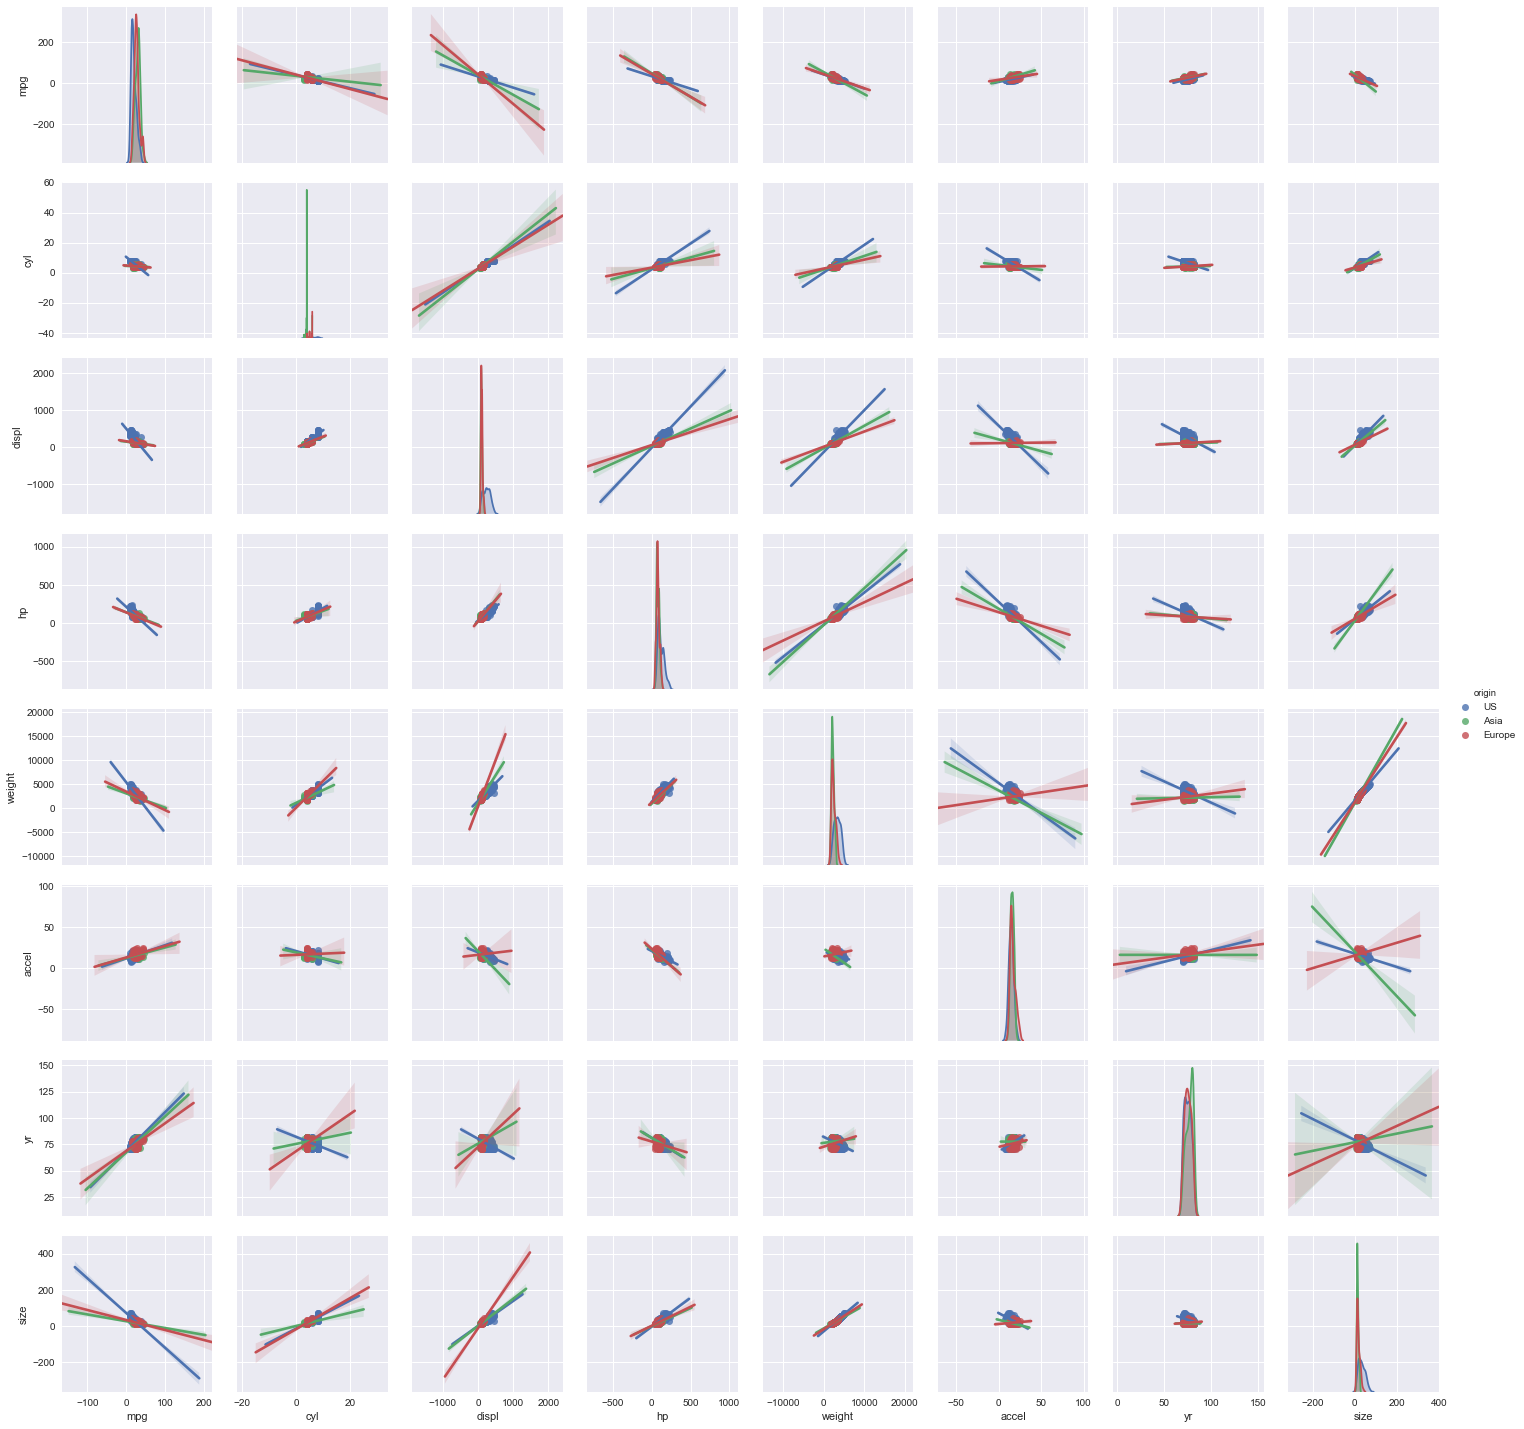

In [77]:
# Print the first 5 rows of the DataFrame
auto.head()

# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(auto, kind='reg', hue='origin')

# Display the plot
plt.show();

Plots like this are why Seaborn is such a useful library: Using just one command, you're able to quickly extract a lot of valuable insight from a dataset.

## Visualizing correlations with a heatmap

Plotting **relationships between many variables** using a pair plot can quickly get visually overwhelming. It is therefore often useful to compute **covariances** between the variables instead. The covariance matrix can then easily be visualized as a `heatmap`. A `heatmap` is effectively a `pseudocolor plot` with labelled rows and columns (i.e., a `pseudocolor plot` based on a pandas DataFrame rather than a matrix). The DataFrame does not have to be square or symmetric (but, in the context of a covariance matrix, it is both).

In this exercise, you will view the covariance matrix between the continuous variables in the auto-mpg dataset. You do not have to know here how the **covariance matrix** is computed; the important point is that its diagonal entries are all 1s, and the off-diagonal entries are between -1 and +1 (quantifying the degree to which variable pairs vary jointly). It is also, then, a symmetric matrix.

In [78]:
cov_matrix = pd.read_csv('data/dc12/cov_matrix.csv', index_col=0)
cov_matrix

,mpg,hp,weight,accel,displ
mpg,1.000000,-0.778427,-0.832244,0.423329,-0.805127
hp,-0.778427,1.000000,0.864538,-0.689196,0.897257
weight,-0.832244,0.864538,1.000000,-0.416839,0.932994
accel,0.423329,-0.689196,-0.416839,1.000000,-0.543800
displ,-0.805127,0.897257,0.932994,-0.543800,1.000000


             mpg        hp    weight     accel     displ
mpg     1.000000 -0.778427 -0.832244  0.423329 -0.805127
hp     -0.778427  1.000000  0.864538 -0.689196  0.897257
weight -0.832244  0.864538  1.000000 -0.416839  0.932994
accel   0.423329 -0.689196 -0.416839  1.000000 -0.543800
displ  -0.805127  0.897257  0.932994 -0.543800  1.000000


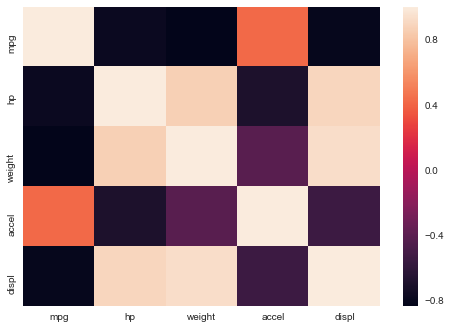

In [79]:
# Print the covariance matrix
print(cov_matrix)

# Visualize the covariance matrix using a heatmap
sns.heatmap(cov_matrix)

# Display the heatmap
plt.show();

If your pair plot starts to become visually overwhelming, heat maps are a great alternative.

# Time Series

## Multiple time series on common axes

For this exercise, you will construct a plot showing four time series stocks on the same axes. The time series in question are represented in the session using the identifiers aapl, ibm, csco, and msft. You'll generate a single plot showing all the time series on common axes with a legend.

In [80]:
stocks = pd.read_csv('data/dc12/stocks.csv', index_col='Date', parse_dates=True)
stocks.head()

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-03,111.937502,116.0000,108.0625,116.5625
2000-01-04,102.500003,112.0625,102.0000,112.6250
2000-01-05,103.999997,116.0000,101.6875,113.8125
2000-01-06,94.999998,114.0000,100.0000,110.0000
2000-01-07,99.500001,113.5000,105.8750,111.4375


In [81]:
aapl = stocks['AAPL']
aapl.head()

Date
2000-01-03    111.937502
2000-01-04    102.500003
2000-01-05    103.999997
2000-01-06     94.999998
2000-01-07     99.500001
Name: AAPL, dtype: float64

In [82]:
ibm = stocks['IBM']
csco = stocks['CSCO']
msft = stocks['MSFT']

In [83]:
# Selecting & Formatting dates
aapl = aapl.resample('M').mean()
aapl[0:10]

Date
2000-01-31    103.359375
2000-02-29    111.638281
2000-03-31    128.502717
2000-04-30    123.105263
2000-05-31    100.810368
2000-06-30     78.889204
2000-07-31     53.759375
2000-08-31     51.311818
2000-09-30     55.755454
2000-10-31     20.573864
Freq: M, Name: AAPL, dtype: float64

In [84]:
ibm = ibm.resample('M').mean()
csco = csco.resample('M').mean()
msft = msft.resample('M').mean()

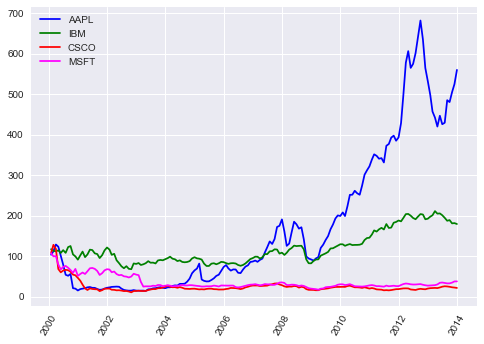

In [85]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Plot the aapl time series in blue
plt.plot(aapl, color='blue', label='AAPL')

# Plot the ibm time series in green
plt.plot(ibm, color='green', label='IBM')

# Plot the csco time series in red
plt.plot(csco, color='red', label='CSCO')

# Plot the msft time series in magenta
plt.plot(msft, color='magenta', label='MSFT')

# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

# Specify the orientation of the xticks
plt.xticks(rotation=60)

# Display the plot
plt.show();

It looks like 'AAPL' has done particularly well in recent years!

## Multiple time series slices (1)

You can easily slice subsets corresponding to different time intervals from a time series. In particular, you can use strings like `'2001:2005'`, `'2011-03:2011-12'`, or `'2010-04-19:2010-04-30'` to extract data from time intervals of length 5 years, 10 months, or 12 days respectively.

Unlike slicing from standard Python lists, tuples, and strings, when slicing time series by labels (and other pandas Series & DataFrames by labels), **the slice includes the right-most portion of the slice**. That is, extracting `my_time_series['1990':'1995']` extracts data from `my_time_series` corresponding to 1990, 1991, 1992, 1993, 1994, and 1995 inclusive.

You can use partial strings or datetime objects for indexing and slicing from time series.

For this exercise, you will use time series slicing to plot the time series `aapl` over its full 11-year range and also over a shorter 2-year range. You'll arrange these plots in a 2×1 grid of subplots.

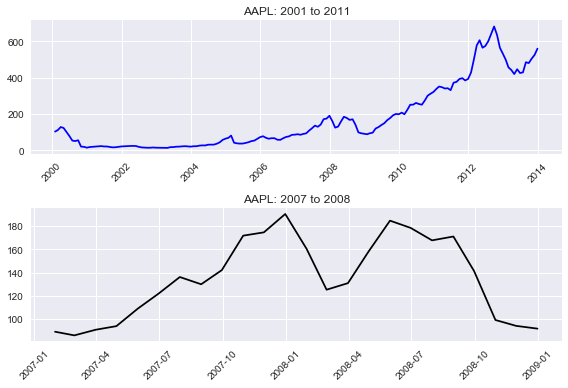

In [86]:
# Plot the series in the top subplot in blue
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: 2001 to 2011')
plt.plot(aapl, color='blue')

# Slice aapl from '2007' to '2008' inclusive: view
view = aapl['2007':'2008']

# Plot the sliced data in the bottom subplot in black
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
plt.tight_layout()
plt.show();

Plotting time series at different intervals can provide you with deeper insight into your data. Here, for example, you can see that the AAPL stock price rose and fell a great amount between 2007 and 2008.

## Multiple time series slices (2)

In this exercise, you will use the same time series `aapl` from the previous exercise and plot tighter views of the data.

Partial string indexing works without slicing as well. For instance, using `my_time_series['1995']`, `my_time_series['1999-05']`, and `my_time_series['2000-11-04']` respectively extracts views of the time series `my_time_series` corresponding to the entire year 1995, the entire month May 1999, and the entire day November 4, 2000.

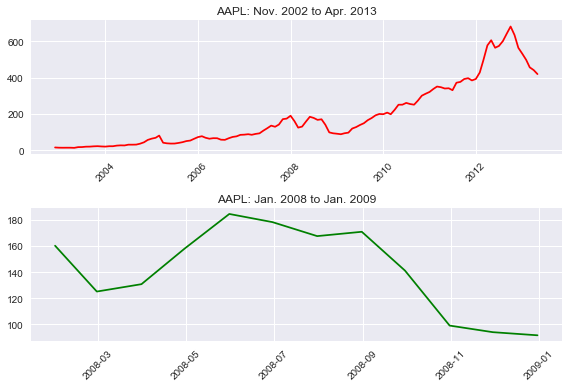

In [87]:
# Slice aapl from Nov. 2002 to Apr. 2013 inclusive: view_1
view_1 = aapl['2002-11':'2013-04']

# Plot the sliced series in the top subplot in red
plt.subplot(2,1,1)
plt.plot(view_1, color='red')
plt.title('AAPL: Nov. 2002 to Apr. 2013')
plt.xticks(rotation=45)

# Reassign the series by slicing the year 2008
view_2 = aapl['2008']

# Plot the sliced series in the bottom subplot in green
plt.subplot(2,1,2)
plt.plot(view_2, color='green')
plt.title('AAPL: Jan. 2008 to Jan. 2009')
plt.xticks(rotation=45)

# Improve spacing and display the plot
plt.tight_layout()
plt.show();

## Plotting an inset view

Remember, rather than comparing plots with subplots or overlayed plots, you can generate an **inset view** directly using `plt.axes()`. In this exercise, you'll reproduce two of the time series plots from the preceding two exercises. Your figure will contain an inset plot to highlight the dramatic changes in AAPL stock price between November 2007 and April 2008 (as compared to the 11 years from 2001 to 2011).

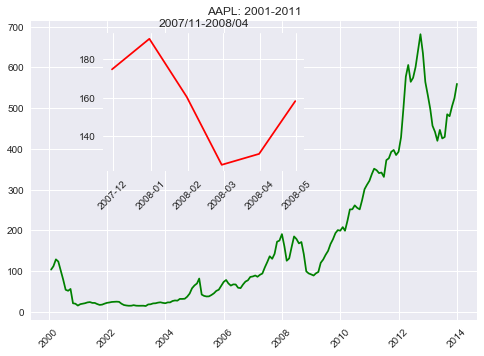

In [88]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']

# Plot the entire series 
plt.plot(aapl, color='green')
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')

# Specify the axes
plt.axes([0.25,0.5,0.35,0.35])

# Plot the sliced series in red using the current axes
plt.plot(view, color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.show();

Inset views are a useful way of comparing time series data.

## Plotting moving averages

In this exercise, you will plot pre-computed moving averages of AAPL stock prices in distinct subplots.

The time series aapl is overlayed in black in each subplot for comparison.
The time series mean_30, mean_75, mean_125, and mean_250 have been computed for you (containing the windowed averages of the series aapl computed over windows of width 30 days, 75 days, 125 days, and 250 days respectively).

In [89]:
# Compute windowed averages
mean_30 = 
mean_75 = 
mean_125 = 
mean_250 = 

SyntaxError: invalid syntax (<ipython-input-89-e0039d838891>, line 2)

In [ ]:
# Plot the 30-day moving average in the top left subplot in green
plt.subplot(2,2,1)
plt.plot(mean_30, color='green')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('30d averages')

# Plot the 75-day moving average in the top right subplot in red
plt.subplot(2,2,2)
plt.plot(mean_75, 'red')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('75d averages')

# Plot the 125-day moving average in the bottom left subplot in magenta
plt.subplot(2, 2, 3)
plt.plot(mean_125, 'magenta')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('125d averages')

# Plot the 250-day moving average in the bottom right subplot in cyan
plt.subplot(2, 2, 4)
plt.plot(mean_250, 'cyan')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('250d averages')

# Display the plot
plt.show()

## Plotting moving standard deviations

Having plotted pre-computed moving averages of AAPL stock prices on distinct subplots in the previous exercise, you will now plot pre-computed moving standard deviations of the same stock prices, this time together on common axes.

The time series aapl is not plotted in this case; it is of a different length scale than the standard deviations.

The time series std_30, std_75, std_125, & std_250 have been computed for you (containing the windowed standard deviations of the series aapl computed over windows of width 30 days, 75 days, 125 days, & 250 days respectively).

In [ ]:
# Compute windowed standard deviations
std_30 = 
std_75 = 
std_125 = 
std_250 = 

In [ ]:
# Plot std_30 in red
plt.plot(std_30, 'red', label='30d')

# Plot std_75 in cyan
plt.plot(std_75, 'cyan', label='75d')

# Plot std_125 in green
plt.plot(std_125, 'green', label='125d')

# Plot std_250 in magenta
plt.plot(std_250, 'magenta', label='250d')

# Add a legend to the upper left
plt.legend(loc='upper left')

# Add a title
plt.title('Moving standard deviations')

# Display the plot
plt.show();

## Interpreting moving statistics

In the previous exercise, you generated the plot below.

<img src="images/moving_std.png" alt="" style="width: 400px;"/>

What length is the moving window that most consistently produces the greatest variance (standard deviation) in the AAPL stock price over the time interval shown?

Answer: 250 days: Wider moving windows admit greater variability!

## Extracting a histogram from a grayscale image

For grayscale images, various image processing algorithms use an **image histogram**. Recall that an image is a two-dimensional array of numerical intensities. An **image histogram**, then, is computed by counting the occurences of distinct pixel intensities over all the pixels in the image.

For this exercise, you will load an unequalized low contrast image of Hawkes Bay, New Zealand. You will plot the image and use the pixel intensity values to plot a normalized histogram of pixel intensities.

In [ ]:
# Load the image into an array: image
image = plt.imread('images/Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels, bins=64, range=(0,256), normed=True, color='red', alpha=0.4)

# Display the plot
plt.show();

## Cumulative Distribution Function from an image histogram

A histogram of a continuous random variable is sometimes called a `Probability Distribution Function` (or `PDF`). The area under a PDF (a definite integral) is called a `Cumulative Distribution Function` (or `CDF`). The CDF quantifies the probability of observing certain pixel intensities.

Your task here is to plot the `PDF` and `CDF` of pixel intensities from a grayscale image. You will use the grayscale image of Hawkes Bay, New Zealand. This time, the 2D array image will be pre-loaded and pre-flattened into the 1D array pixels for you.

The histogram option `cumulative=True` permits viewing the `CDF` instead of the `PDF`.

Notice that `plt.grid('off')` switches off distracting grid lines.

The command `plt.twinx()` allows two plots to be overlayed sharing the x-axis but with different scales on the y-axis.

/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


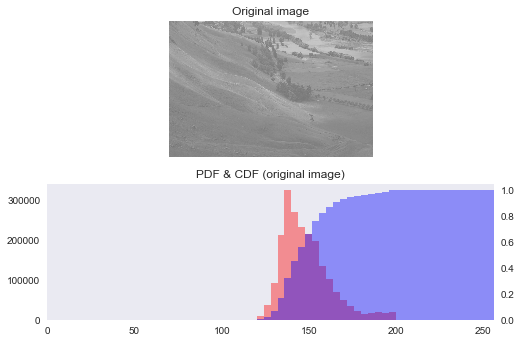

In [90]:
# Load the image into an array: image
image = plt.imread('images/Unequalized_Hawkes_Bay_NZ.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
pdf = plt.hist(pixels, bins=64, range=(0,256), density=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               cumulative=True, density=True,
               color='blue', alpha=0.4)
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (original image)')
plt.show();

Notice that the histogram is not well centered over the range of possible pixel intensies. The CDF rises sharply near the middle (that relates to the overall grayness of the image).

## Equalizing an image histogram

**Histogram equalization** is an image processing procedure that reassigns image pixel intensities. The basic idea is to use `interpolation` to map the original `CDF` of pixel intensities to a `CDF` that is almost a straight line. In essence, the pixel intensities are spread out and this has the practical effect of making a sharper, contrast-enhanced image. This is particularly useful in astronomy and medical imaging to help us see more features.

For this exercise, you will again work with the grayscale image of Hawkes Bay, New Zealand. Notice the sample code produces the same plot as the previous exercise. Your task is to modify the code from the previous exercise to plot the new equalized image as well as its `PDF` and `CDF`.

The arrays image and pixels are extracted for you in advance.

The `CDF` of the original image is computed using `plt.hist()`.

Notice an array `new_pixels` is created for you that interpolates new pixel values using the original image `CDF`.

/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplo

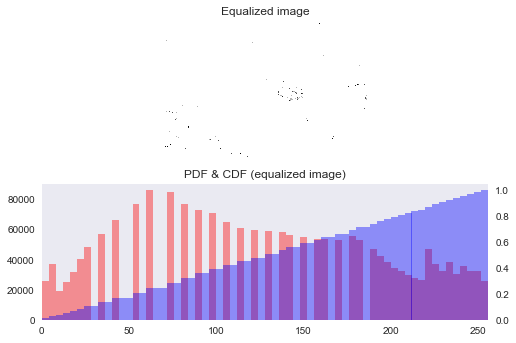

In [91]:
# Load the image into an array: image
image = plt.imread('images/Unequalized_Hawkes_Bay_NZ.jpg')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), normed=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image, cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid('off')

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)
plt.show();

## Extracting histograms from a color image

This exercise resembles the last in that you will plot histograms from an image. This time, you will use a color image of the [Helix Nebula as seen by the Hubble and the Cerro Toledo Inter-American Observatory](https://imgsrc.hubblesite.org/hu/db/images/hs-2004-32-b-small_web.jpg). The separate RGB (red-green-blue) channels will be extracted for you as two-dimensional arrays red, green, and blue respectively. You will plot three overlaid color histograms on common axes (one for each channel) in a subplot as well as the original image in a separate subplot.

/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


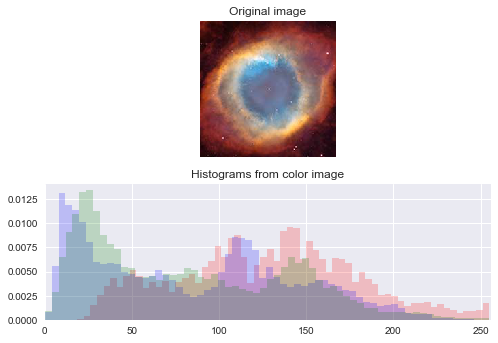

In [92]:
# Load the image into an array: image
image = plt.imread('images/hs-2004-32-b-small_web.jpg')

# Display image in top subplot
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, blue, green
red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)
plt.hist(green_pixels, bins=64, normed=True, color='green', alpha=0.2)

# Display the plot
plt.show();

Notice how the histogram generated from this color image differs from the histogram you generated earlier from a grayscale image.

## Extracting bivariate histograms from a color image

Rather than overlaying univariate histograms of intensities in distinct channels, it is also possible to view the joint variation of pixel intensity in two different channels.

For this final exercise, you will use the same color image of the Helix Nebula as seen by the Hubble and the Cerro Toledo Inter-American Observatory. The separate RGB (red-green-blue) channels will be extracted for you as one-dimensional arrays red_pixels, green_pixels, & blue_pixels respectively.

/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/ksatola/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


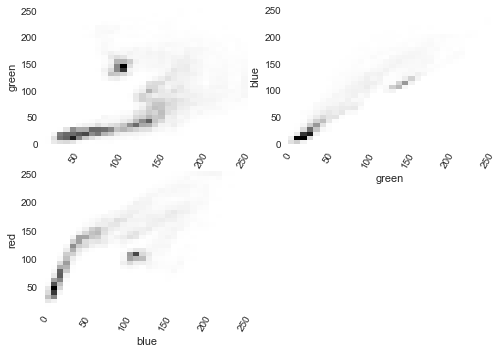

In [93]:
# Load the image into an array: image
image = plt.imread('images/hs-2004-32-b-small_web.jpg')

plt.style.use('seaborn-dark')

# Extract RGB channels and flatten into 1-D array
red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid('off') 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels, green_pixels, bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels, blue_pixels, bins=(32,32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid('off')
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels, red_pixels, bins=(32,32))

# Display the plot
plt.show();

## Clustering - Hierarchical Clustering - Dendrogram

Dendrograms are a great way to illustrate the arrangement of the clusters produced by hierarchical clustering.

In [94]:
samples = np.array([[14.88, 14.57, 0.8811, 5.553999999999999, 3.333, 1.018, 4.956],
 [14.69, 14.49, 0.8799, 5.563, 3.259, 3.5860000000000003, 5.218999999999999],
 [14.03, 14.16, 0.8796, 5.438, 3.201, 1.7169999999999999, 5.001],
 [13.99, 13.83, 0.9183, 5.119, 3.383, 5.234, 4.781000000000001],
 [14.11, 14.26, 0.8722, 5.52, 3.168, 2.688, 5.218999999999999],
 [13.02, 13.76, 0.8641, 5.395, 3.0260000000000002, 3.373, 4.825],
 [15.49, 14.94, 0.8724, 5.757000000000001, 3.3710000000000004, 3.412, 5.228],
 [16.2, 15.27, 0.8734, 5.8260000000000005, 3.464, 2.823, 5.527],
 [13.5, 13.85, 0.8852, 5.351, 3.158, 2.249, 5.176],
 [15.36,
  14.76,
  0.8861,
  5.7010000000000005,
  3.3930000000000002,
  1.367,
  5.132000000000001],
 [15.78, 14.91, 0.8923, 5.6739999999999995, 3.4339999999999997, 5.593, 5.136],
 [14.46, 14.35, 0.8818, 5.388, 3.377, 2.802, 5.044],
 [11.23, 12.63, 0.884, 4.902, 2.8789999999999996, 2.269, 4.703],
 [14.34, 14.37, 0.8726, 5.63, 3.19, 1.3130000000000002, 5.15],
 [16.84, 15.67, 0.8623, 5.997999999999999, 3.484, 4.675, 5.877000000000001],
 [17.32, 15.91, 0.8599, 6.064, 3.403, 3.824, 5.922000000000001],
 [18.72, 16.19, 0.8977, 6.006, 3.8569999999999998, 5.324, 5.879],
 [18.88, 16.26, 0.8969, 6.084, 3.764, 1.649, 6.109],
 [18.76, 16.2, 0.8984, 6.172000000000001, 3.7960000000000003, 3.12, 6.053],
 [19.31, 16.59, 0.8815, 6.341, 3.81, 3.477, 6.2379999999999995],
 [17.99, 15.86, 0.8992, 5.89, 3.694, 2.068, 5.837000000000001],
 [18.85, 16.17, 0.9056, 6.152, 3.806, 2.843, 6.2],
 [19.38, 16.72, 0.8716, 6.303, 3.7910000000000004, 3.678, 5.965],
 [18.96, 16.2, 0.9077, 6.051, 3.897, 4.334, 5.75],
 [18.14, 16.12, 0.8772, 6.059, 3.563, 3.6189999999999998, 6.011],
 [18.65, 16.41, 0.8698, 6.285, 3.594, 4.391, 6.102],
 [18.94, 16.32, 0.8942, 6.144, 3.825, 2.908, 5.949],
 [17.36, 15.76, 0.8785, 6.145, 3.574, 3.5260000000000002, 5.971],
 [13.32, 13.94, 0.8613, 5.541, 3.073, 7.035, 5.44],
 [11.43, 13.13, 0.8335, 5.176, 2.719, 2.221, 5.132000000000001],
 [12.01, 13.52, 0.8249, 5.405, 2.7760000000000002, 6.992000000000001, 5.27],
 [11.34, 12.87, 0.8596, 5.053, 2.8489999999999998, 3.347, 5.003],
 [12.02, 13.33, 0.8503, 5.35, 2.81, 4.271, 5.308],
 [12.44, 13.59, 0.8462, 5.319, 2.897, 4.9239999999999995, 5.27],
 [11.55, 13.1, 0.8455, 5.167000000000001, 2.845, 6.715, 4.956],
 [11.26, 13.01, 0.8355, 5.186, 2.71, 5.335, 5.092],
 [12.46, 13.41, 0.8706, 5.236000000000001, 3.017, 4.987, 5.147],
 [11.81, 13.45, 0.8198, 5.412999999999999, 2.716, 4.898, 5.352],
 [11.27, 12.86, 0.8563, 5.091, 2.804, 3.985, 5.001],
 [12.79, 13.53, 0.8786, 5.224, 3.054, 5.483, 4.958],
 [12.67, 13.32, 0.8977, 4.984, 3.135, 2.3, 4.745],
 [11.23, 12.88, 0.8511, 5.14, 2.795, 4.325, 5.003]])

In [95]:
samples[:10]

array([[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ]])

In [96]:
varieties = ['Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Kama wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat', 'Canadian wheat']

In [97]:
varieties[:10]

['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat']

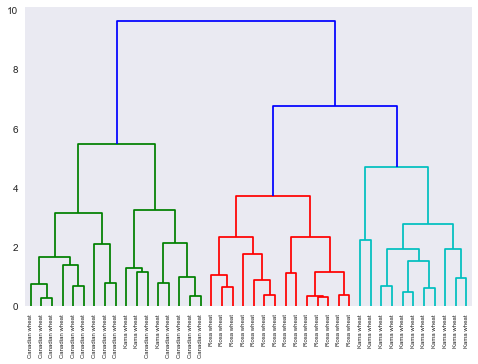

In [98]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show();